In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from copy import deepcopy

import imodels

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

In [3]:
def decision_boundary(X, y, model, model_name, cols, filename):
    fig = plt.figure(model_name)
    plt.clf()
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X, grid_resolution=200, response_method="predict", alpha=0.5, cmap="coolwarm"
    )
    ax = disp.ax_
    ax.scatter(X[y==0, 0], X[y==0, 1], s=3, c="dodgerblue", marker="s", alpha=0.3, label=0)
    ax.scatter(X[y==1, 0], X[y==1, 1], s=3, c="orangered", marker="^", alpha=0.3, label=1)
    ax.set_xlabel(cols[0])
    ax.set_ylabel(cols[1])
    ax.set_title(f"{model_name} (AUC {sklearn.metrics.roc_auc_score(y, model.predict(X)):.3f})")
    ax.legend()
    plt.savefig(filename, bbox_inches=None, facecolor="white", edgecolor='auto')

In [16]:
def test_simpler_boundary(dataset_name, database_name, colx_name, coly_name, reg_param=10):
    X, y, cols = imodels.util.data_util.get_clean_dataset(dataset_name, database_name)
    cols = np.array(cols)
    
    # Test which feature is the most important
    mean_feature_importance = np.zeros(X.shape[1])
    N = 10
    for _ in range(N):
        tree = DecisionTreeClassifier(criterion='gini')
        tree.fit(X, y)
        mean_feature_importance += tree.feature_importances_
    mean_feature_importance /= N
    most_important = np.flip(np.argsort(mean_feature_importance))
    print(f"     Feature importance\n{34*'='}")
    for i, _ in zip(most_important, range(10)):
        print(f"{cols[i]:>25s} | {mean_feature_importance[i]:.3f}")
    print(f"Provided most important: [{colx_name}, {coly_name}]")
    
    # Select provided columns
    new_X = X[:, np.array([np.where(cols == colx_name)[0][0], np.where(cols == coly_name)[0][0]])]
    
    # Train the random forest
    RF = RandomForestClassifier(n_estimators=50)
    RF.fit(new_X, y)
    hsRF = imodels.HSTreeClassifier(deepcopy(RF), reg_param=reg_param)
    
    decision_boundary(new_X, y, RF, "RF", (colx_name, coly_name), "figures/boundaries_"+dataset_name+"_RF")
    decision_boundary(new_X, y, hsRF, "hsRF", (colx_name, coly_name), "figures/boundaries_"+dataset_name+"_hsRF")

     Feature importance
              att_13_-1.0 | 0.270
                   att_12 | 0.152
                    att_5 | 0.087
                    att_3 | 0.085
                    att_1 | 0.084
                    att_4 | 0.073
                   att_10 | 0.067
                    att_2 | 0.053
                    att_8 | 0.052
                    att_9 | 0.046
Provided most important: [att_8, att_10]


<Figure size 1920x1440 with 0 Axes>

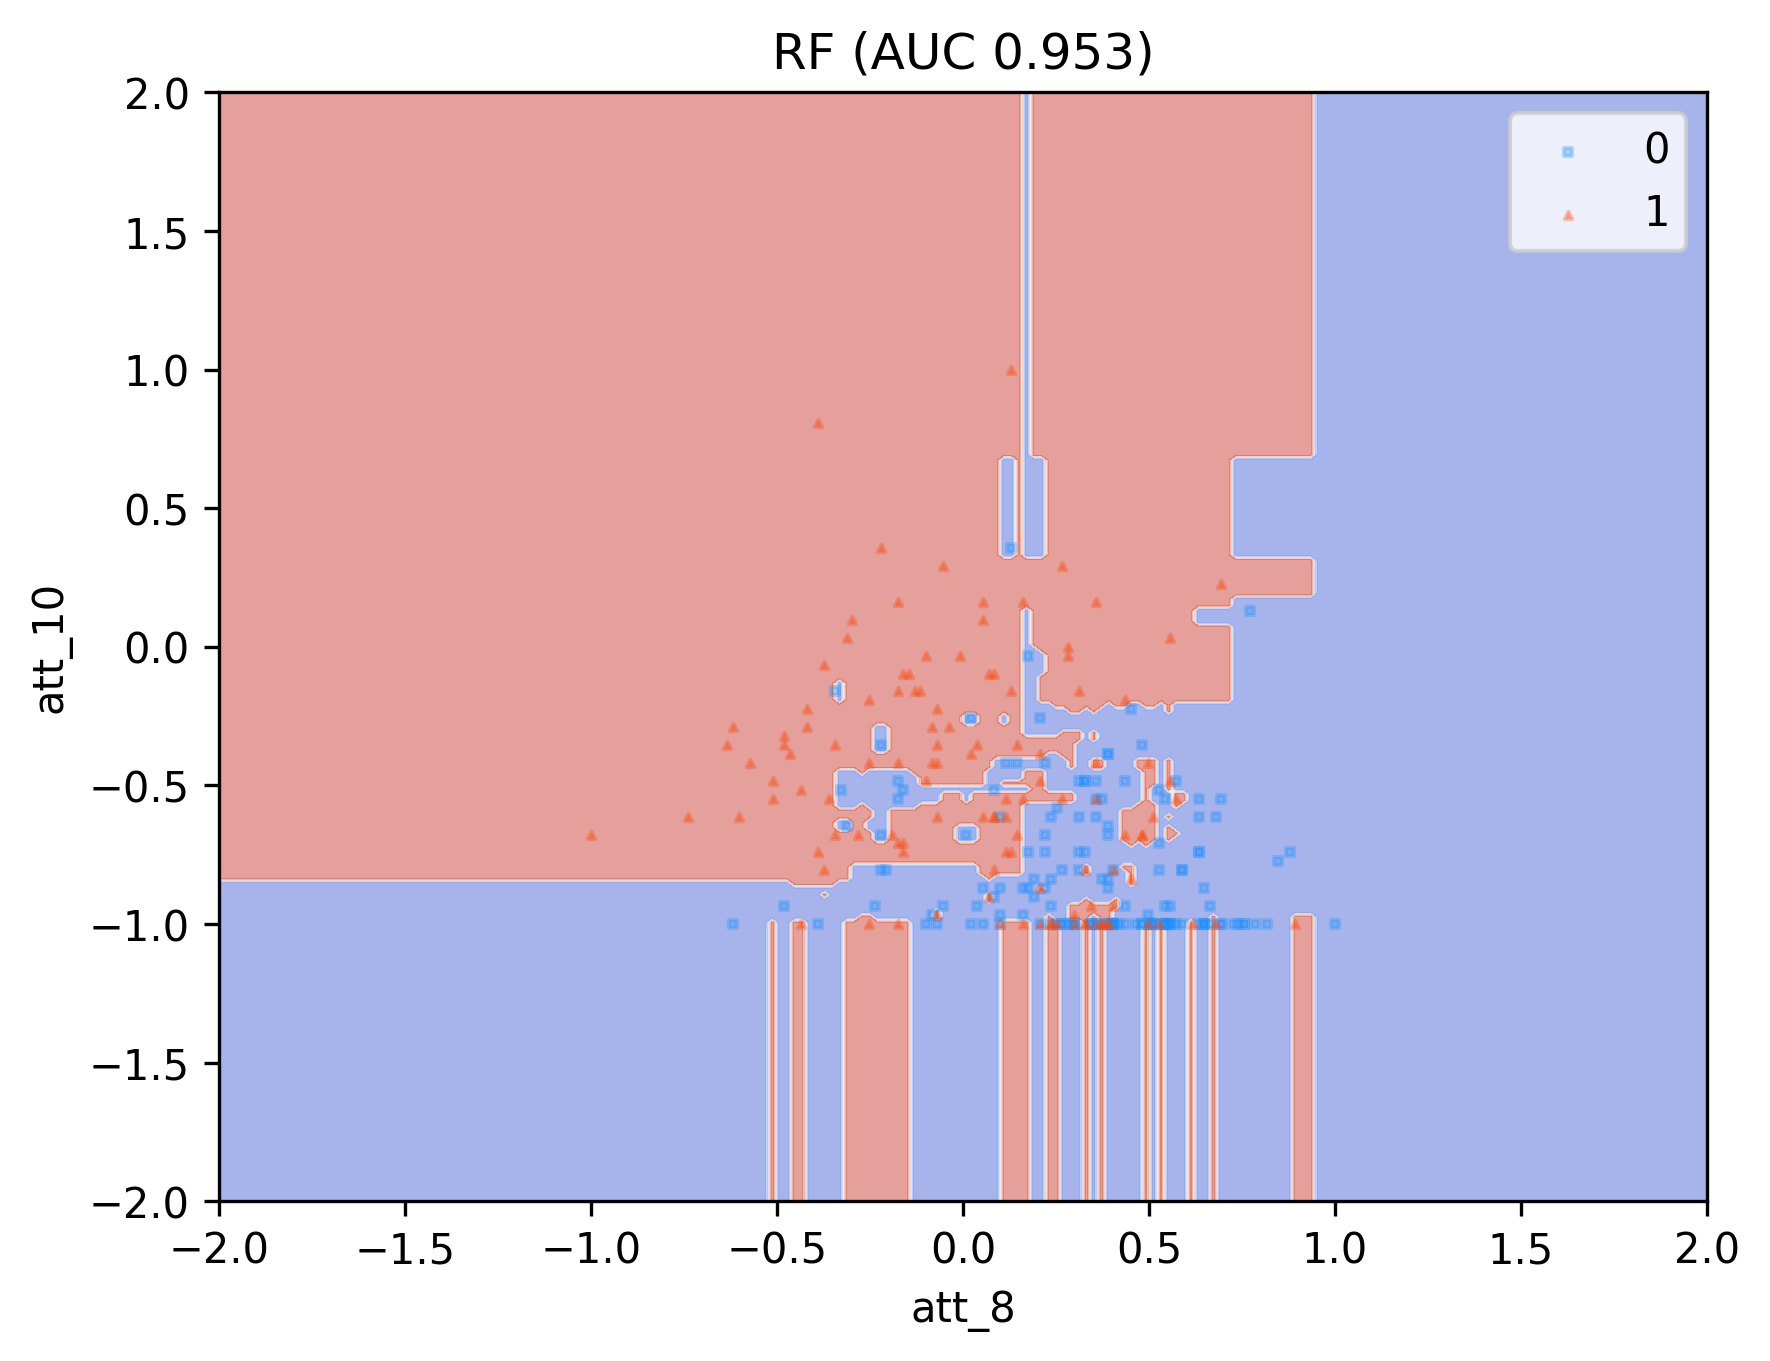

<Figure size 1920x1440 with 0 Axes>

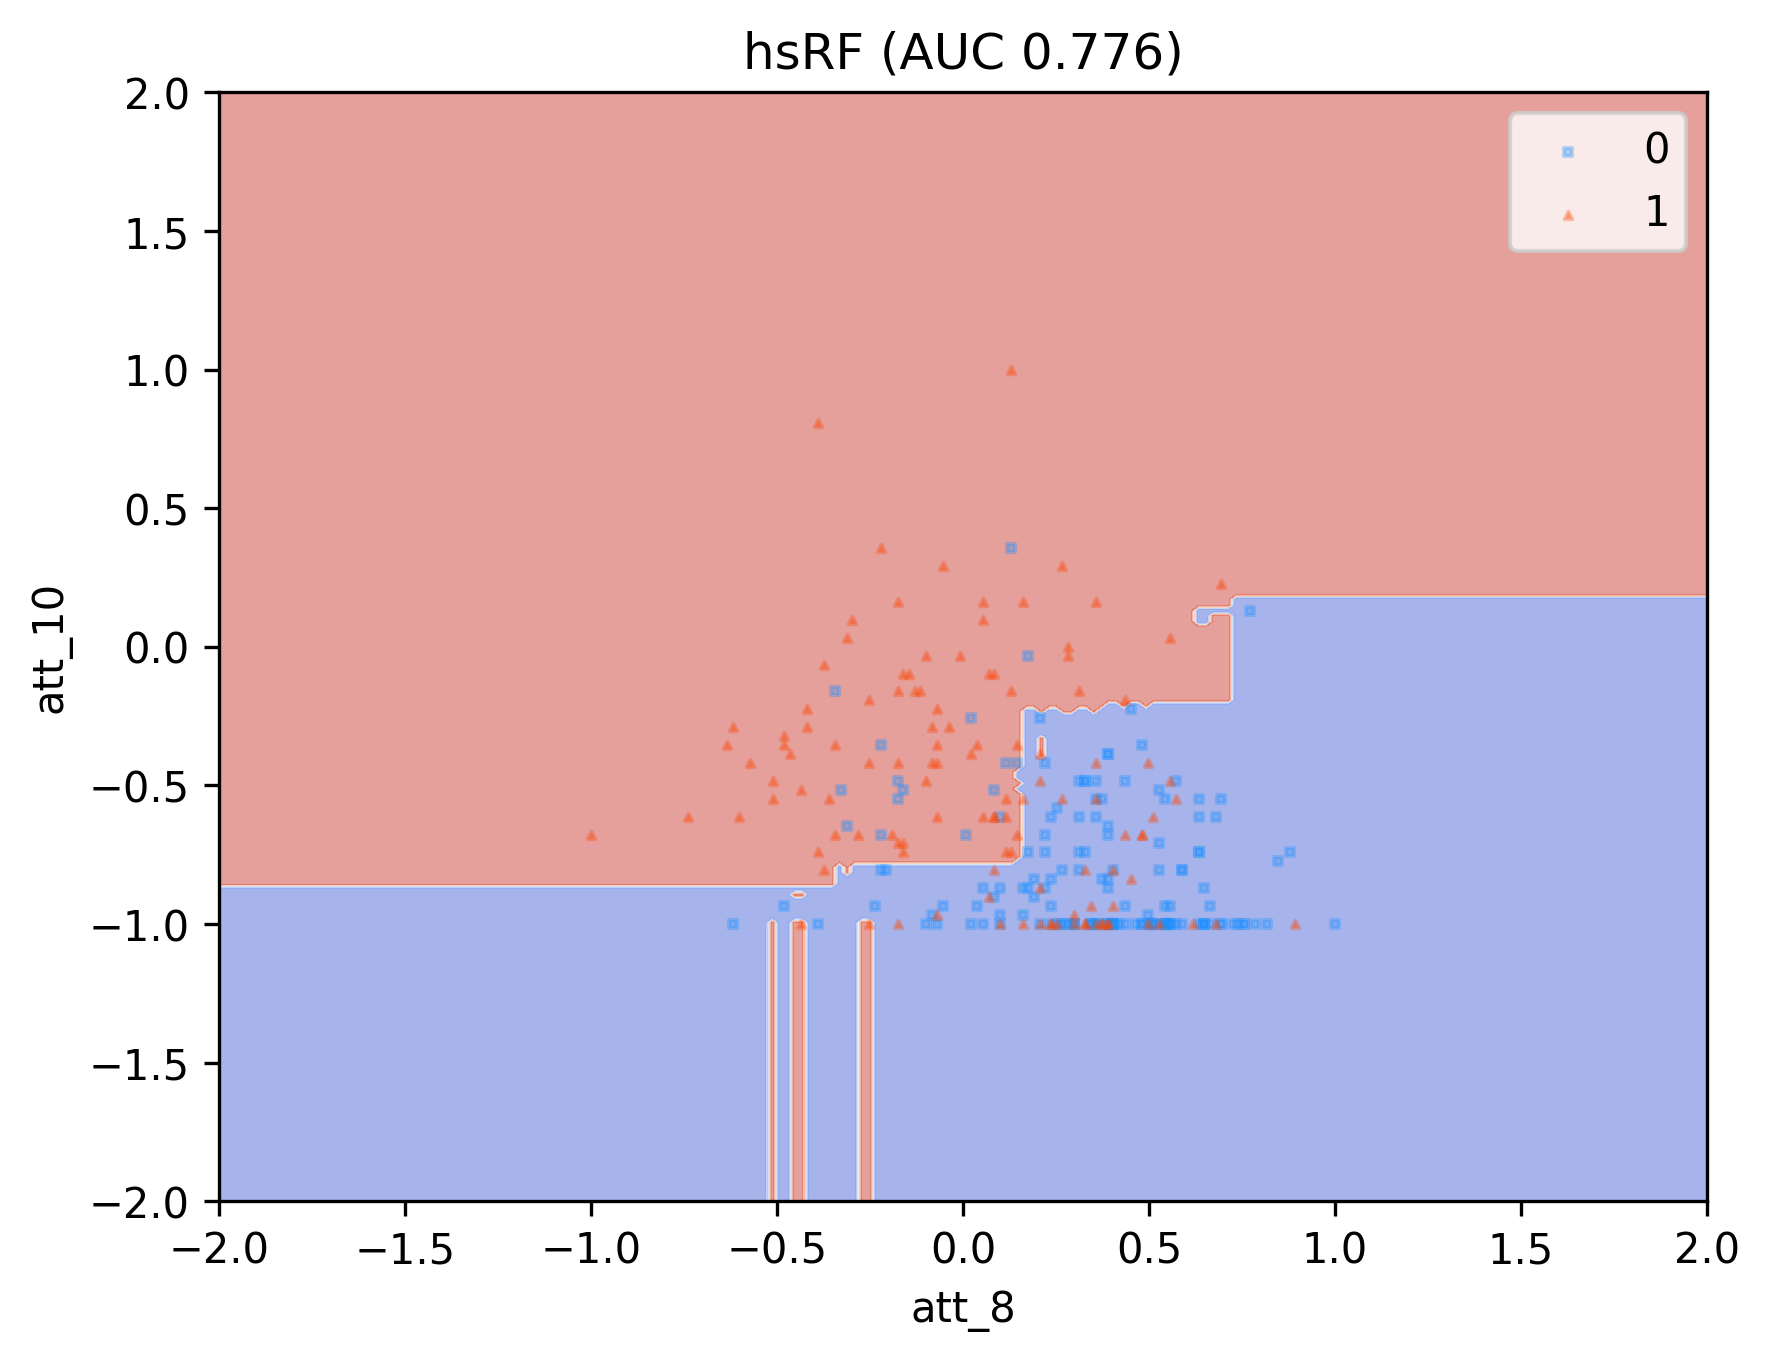

In [17]:
np.random.seed(0)
test_simpler_boundary("heart", "imodels", "att_8", "att_10", reg_param=100)

     Feature importance
               tumor-size | 0.203
                      age | 0.137
            deg-malig_2.0 | 0.128
                inv-nodes | 0.119
                   breast | 0.063
          breast-quad_0.0 | 0.062
                node-caps | 0.048
            menopause_2.0 | 0.040
          breast-quad_1.0 | 0.038
            deg-malig_1.0 | 0.033
Provided most important: [age, tumor-size]


<Figure size 1920x1440 with 0 Axes>

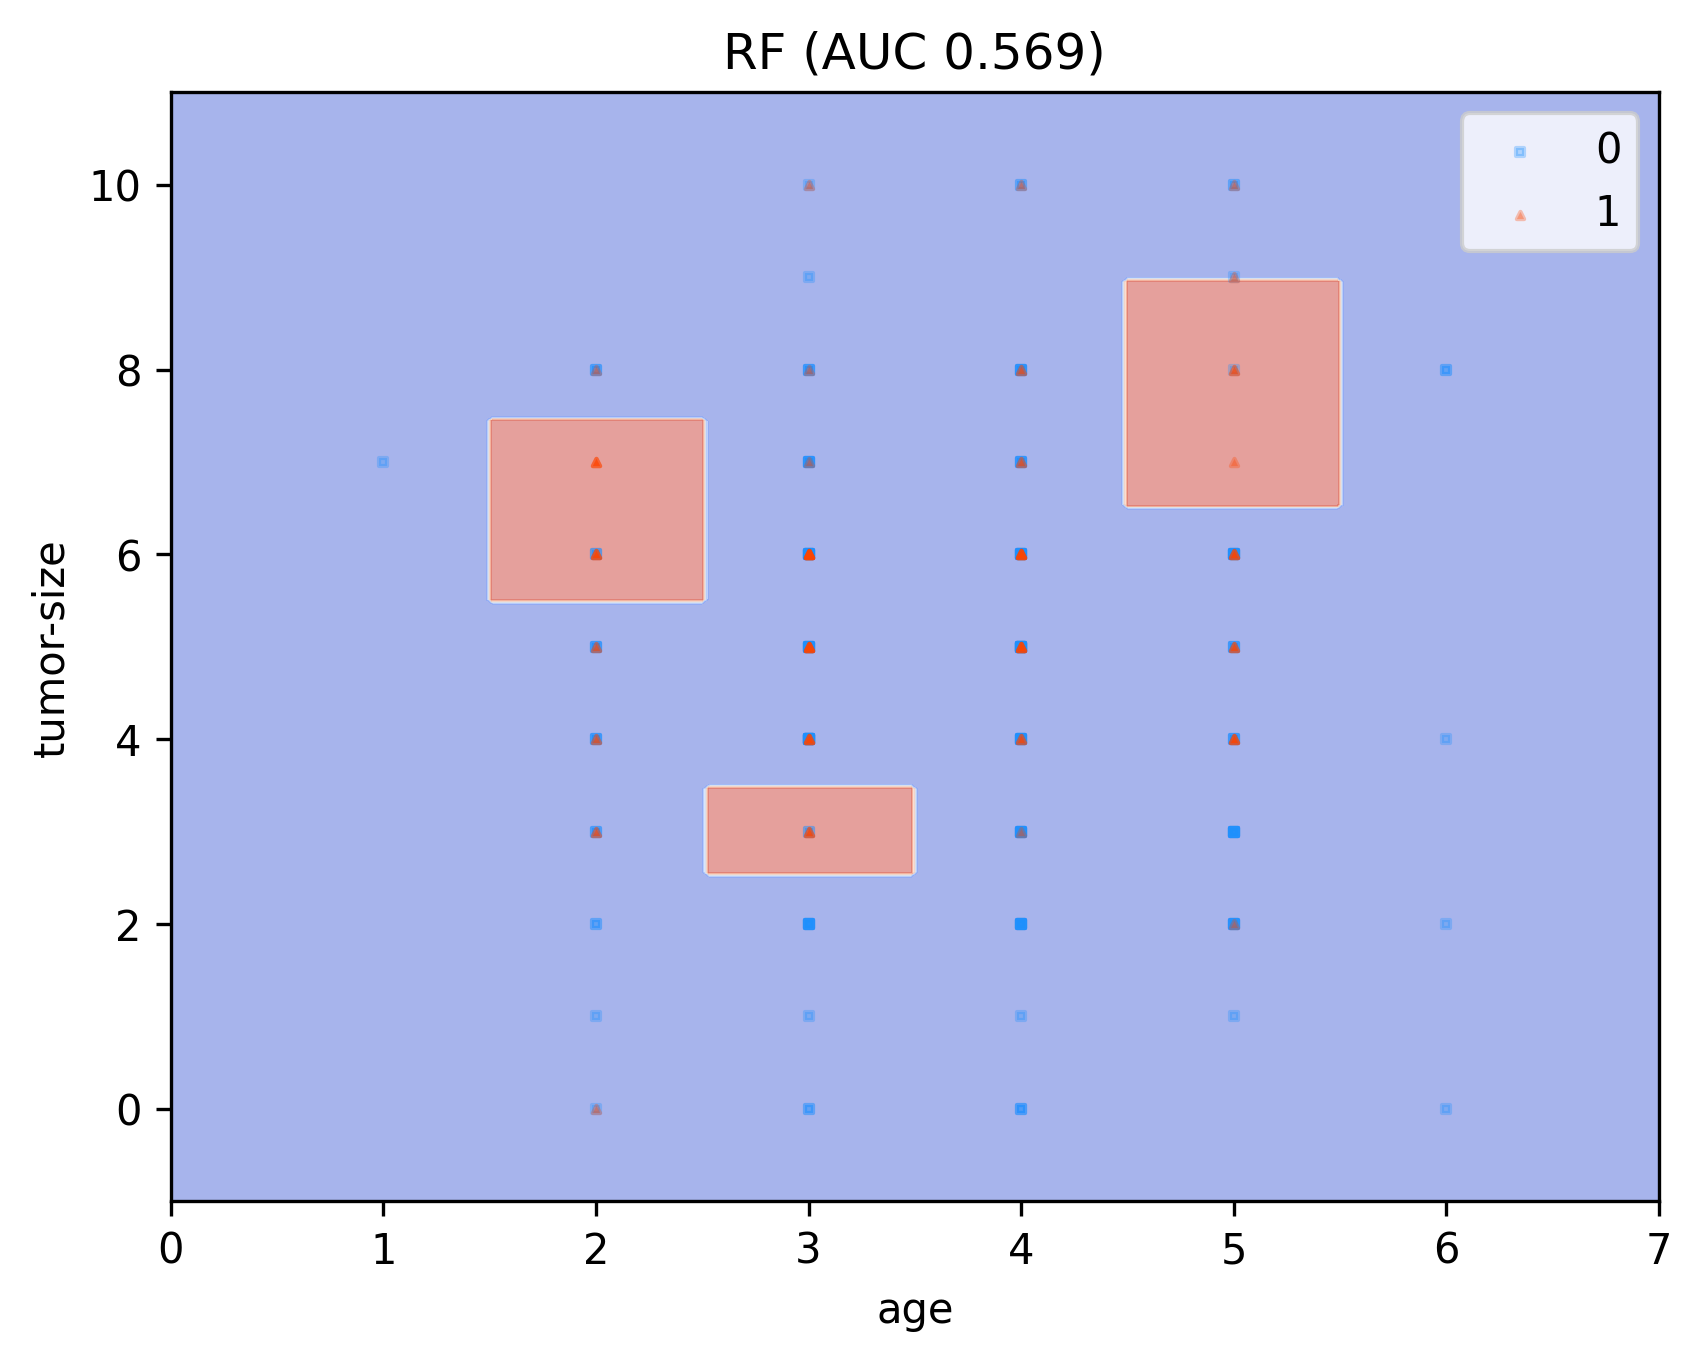

<Figure size 1920x1440 with 0 Axes>

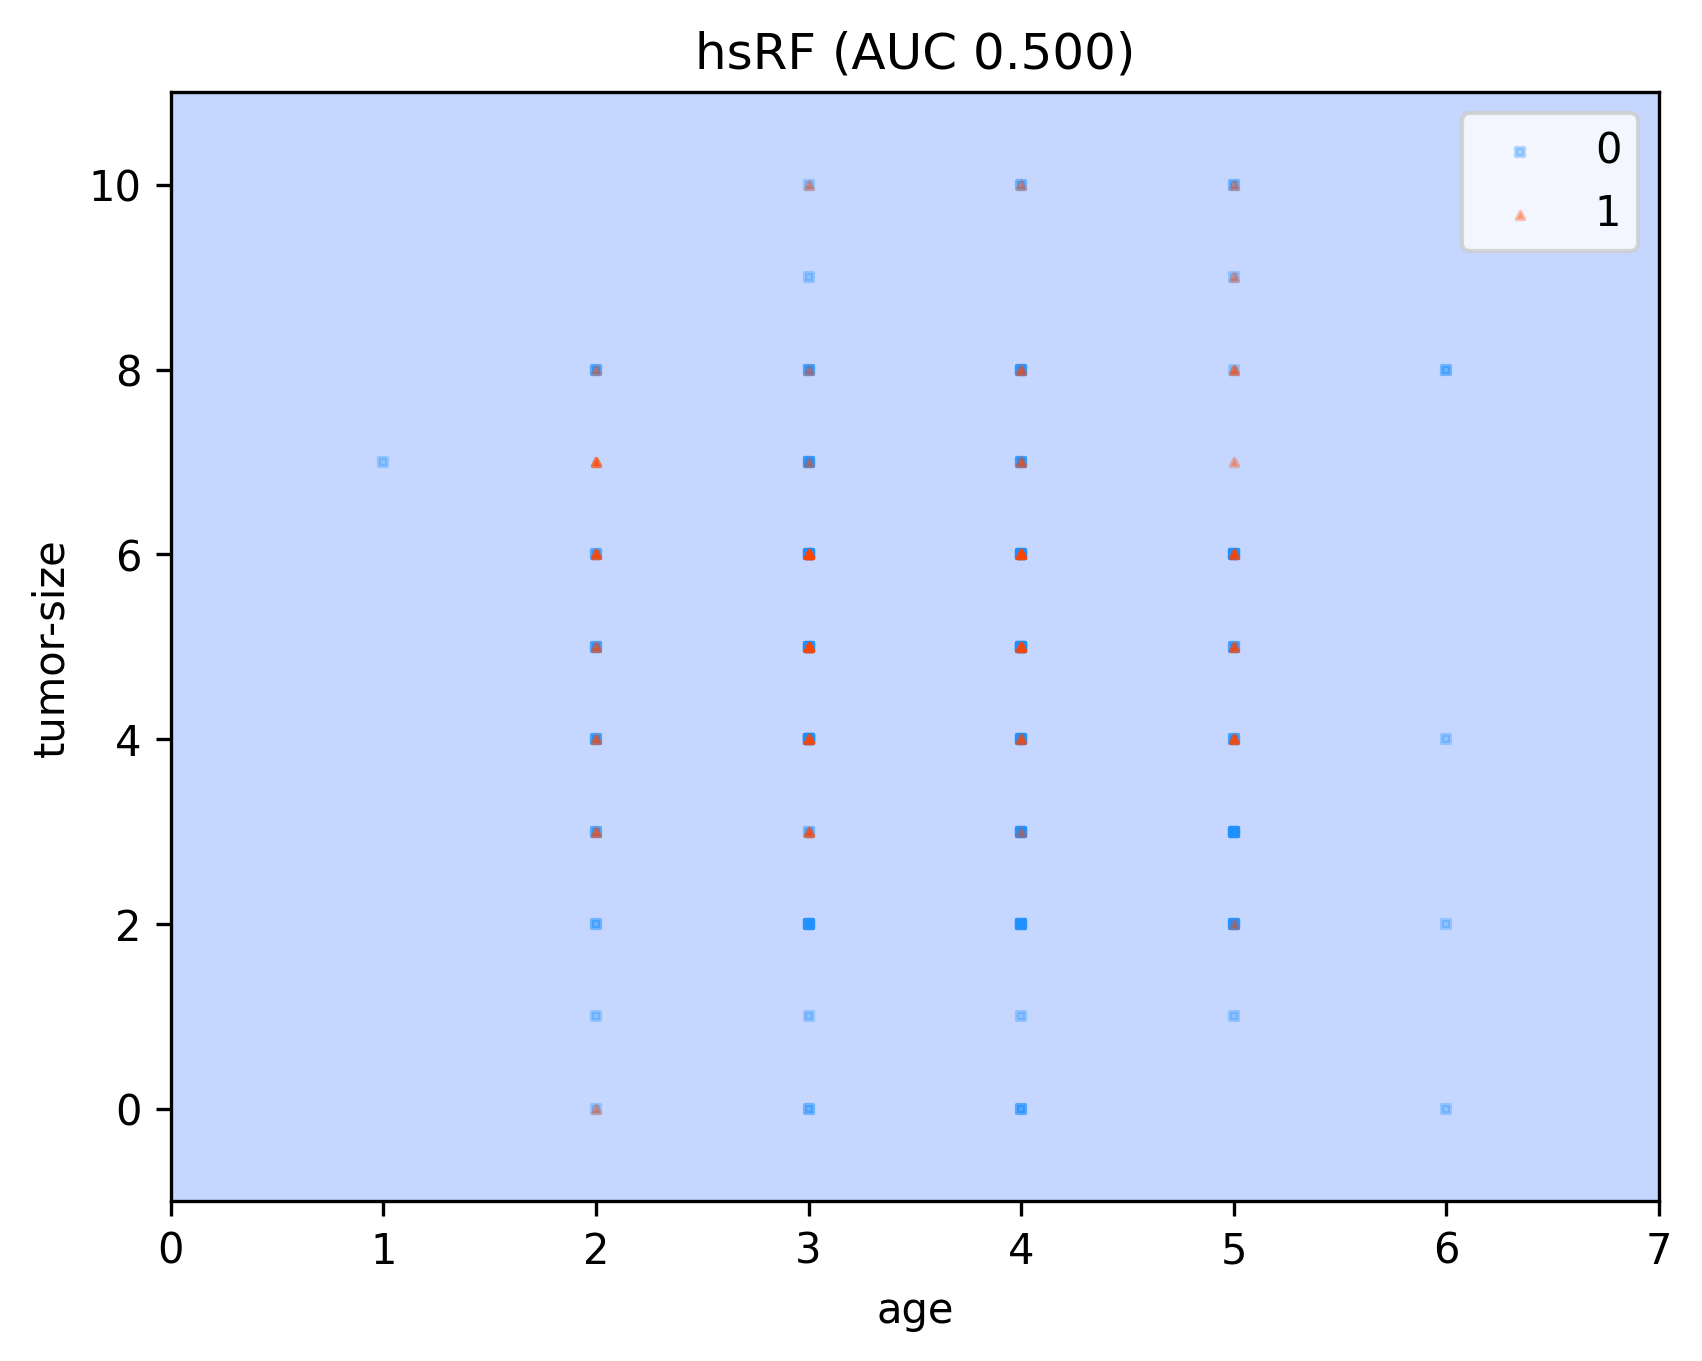

In [18]:
np.random.seed(0)
test_simpler_boundary("breast_cancer", "imodels", "age", "tumor-size", reg_param=100)

     Feature importance
Age_of_patient_at_time_of_operation | 0.446
Patients_year_of_operation | 0.291
Number_of_positive_axillary_nodes_detected | 0.263
Provided most important: [Age_of_patient_at_time_of_operation, Number_of_positive_axillary_nodes_detected]


<Figure size 1920x1440 with 0 Axes>

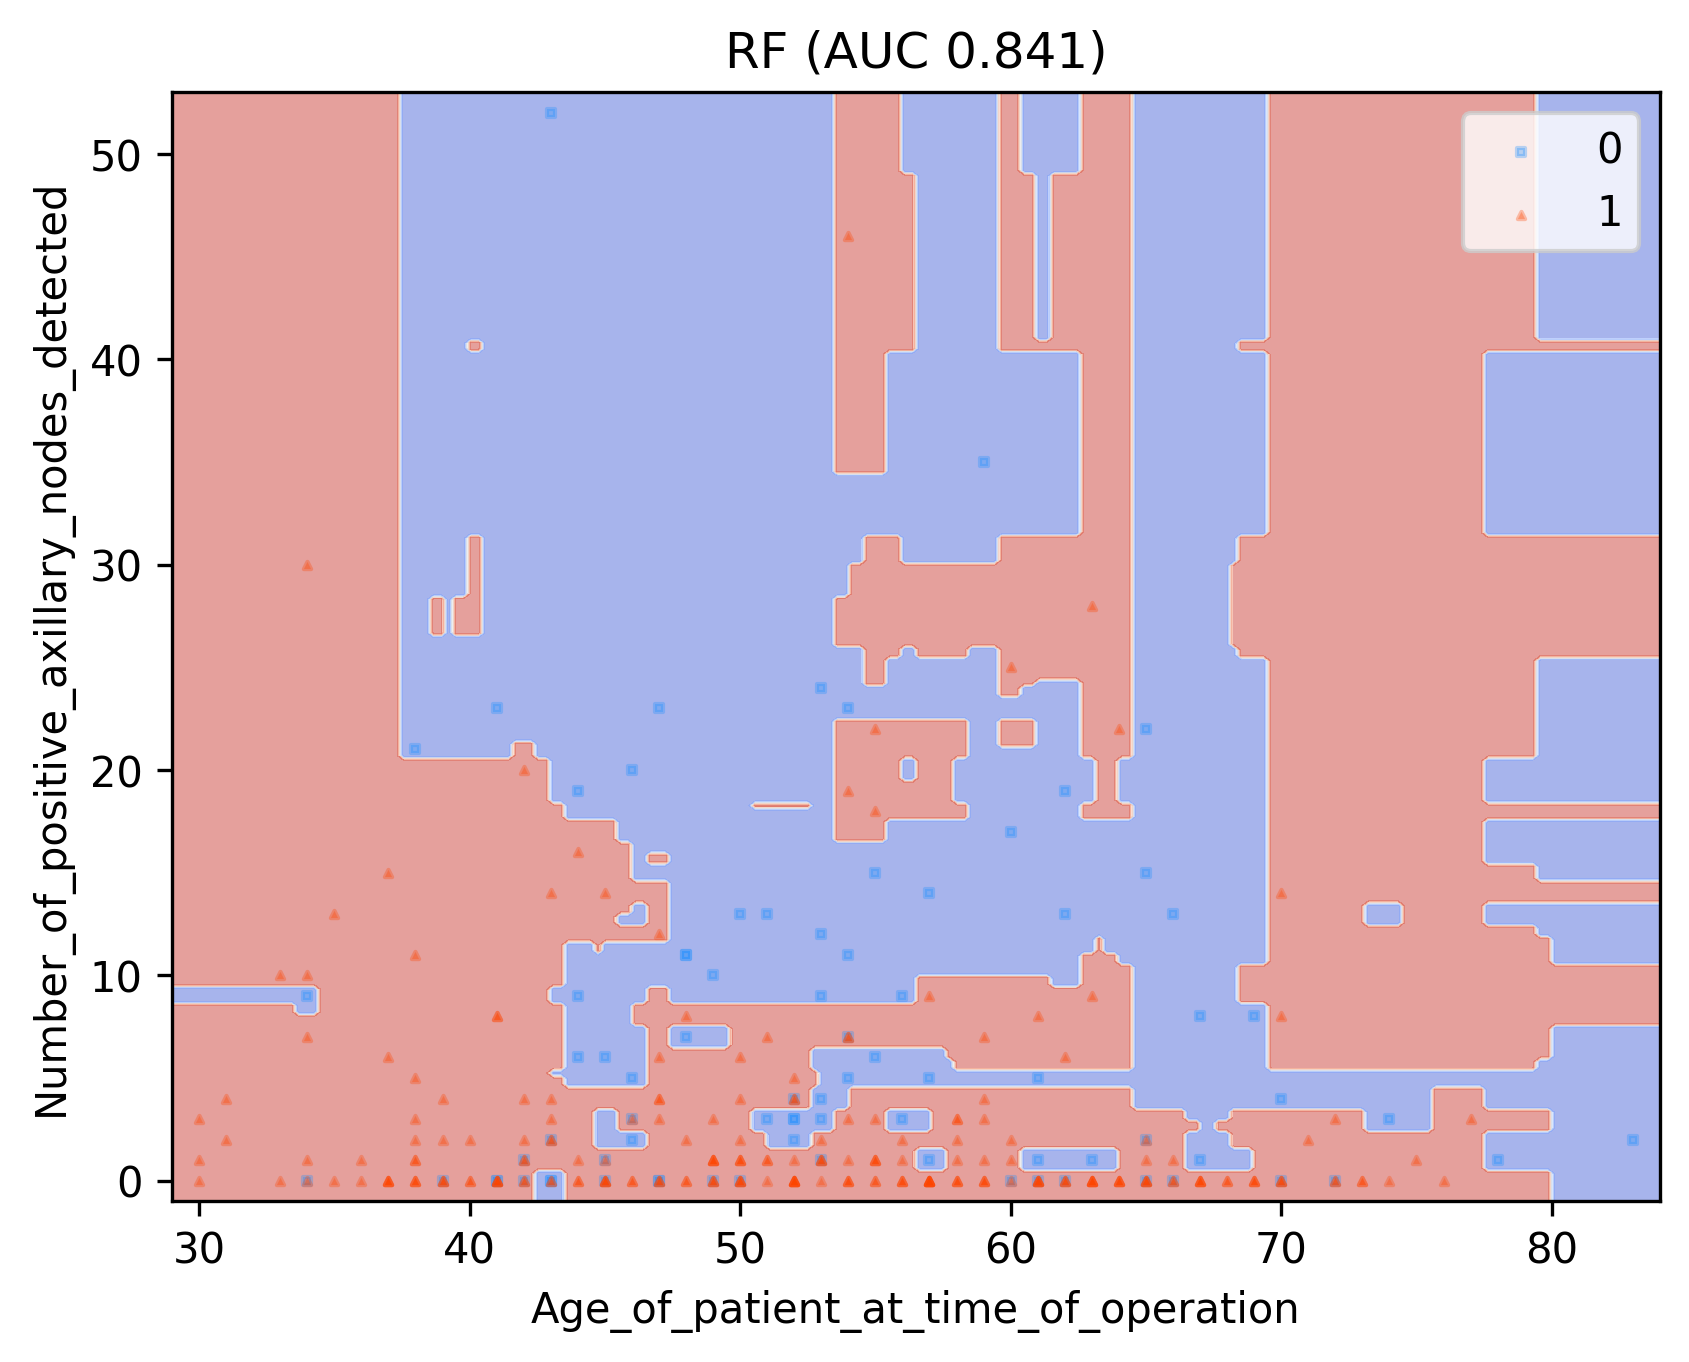

<Figure size 1920x1440 with 0 Axes>

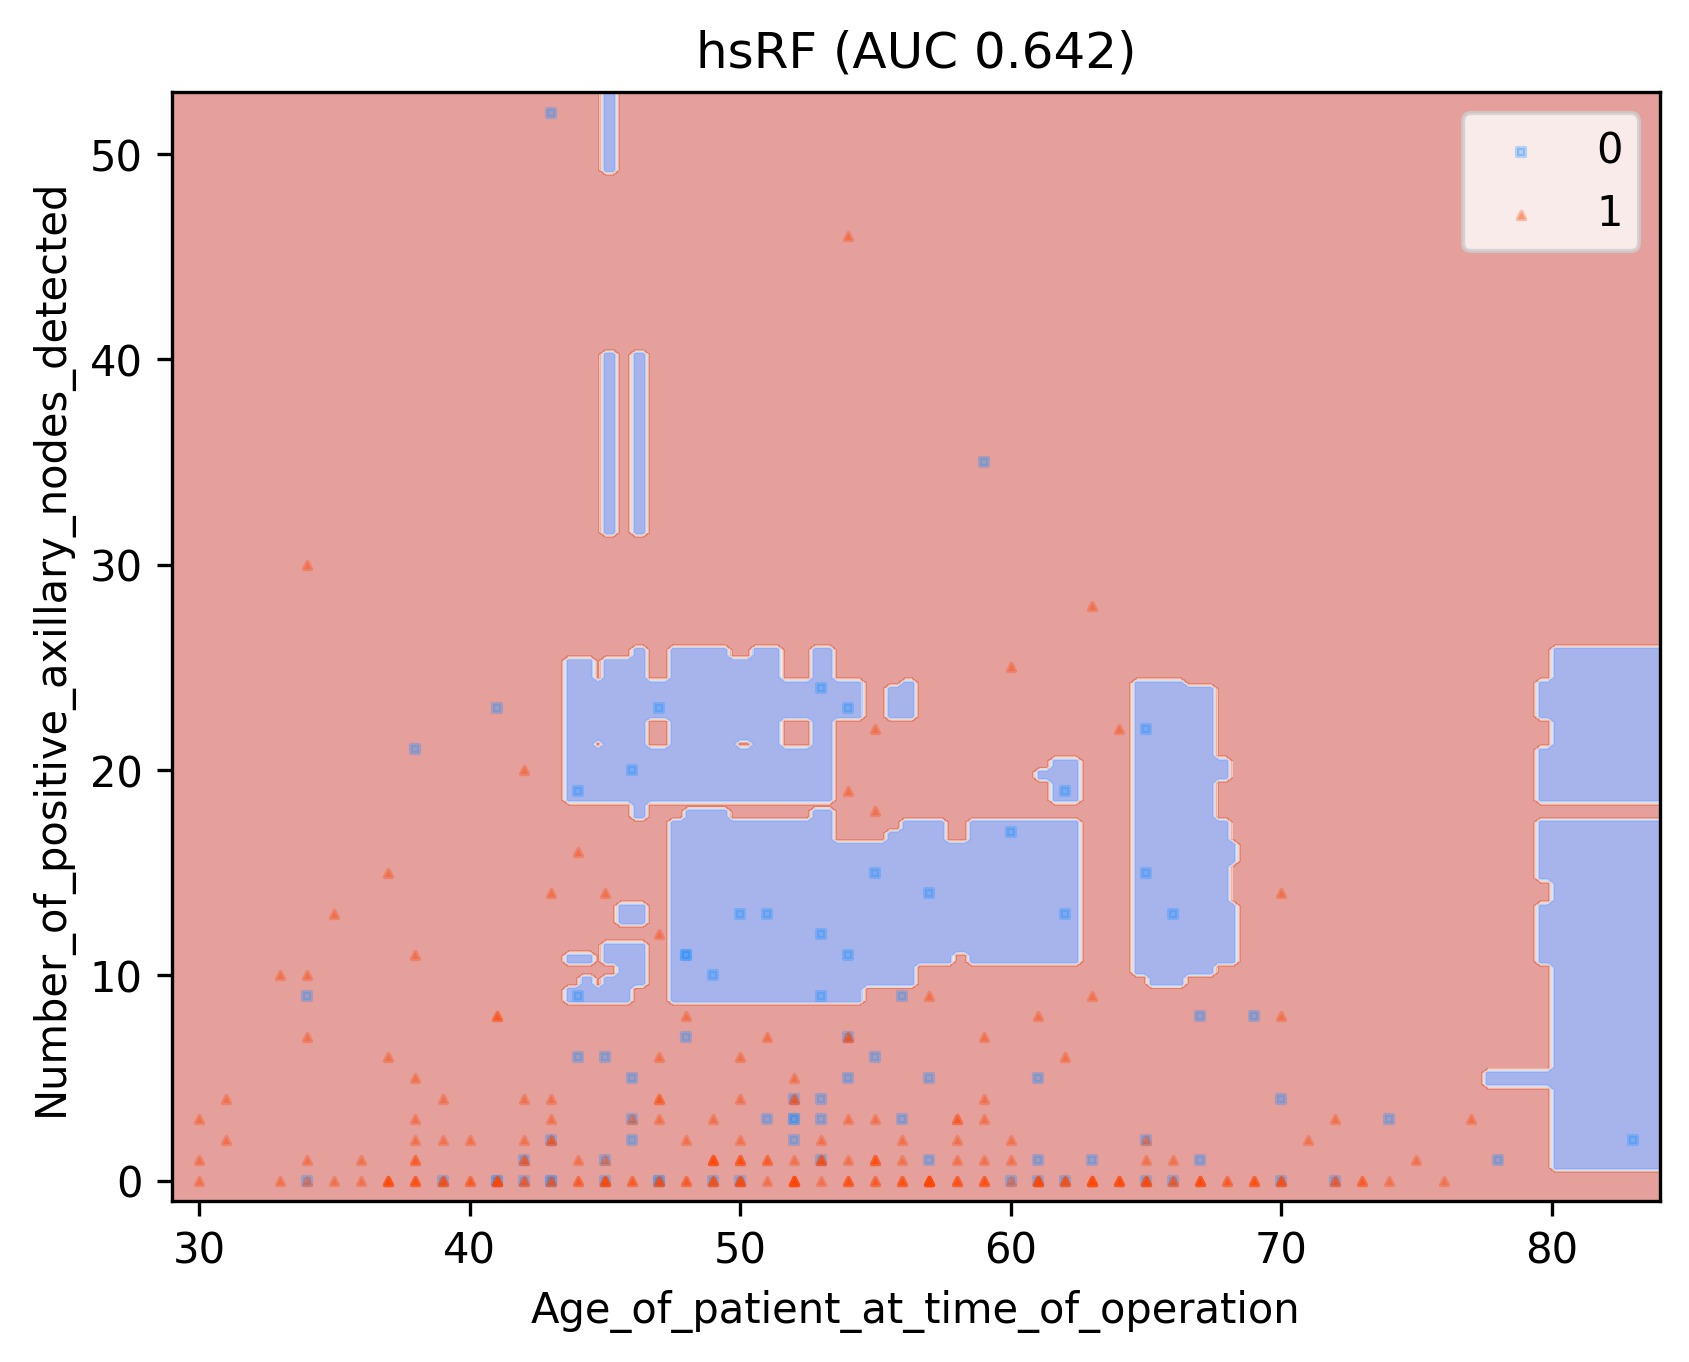

In [19]:
np.random.seed(0)
test_simpler_boundary("haberman", "imodels", "Age_of_patient_at_time_of_operation", "Number_of_positive_axillary_nodes_detected", reg_param=100)

     Feature importance
                      X_4 | 0.444
                     X_26 | 0.247
                     X_13 | 0.031
                      X_2 | 0.026
                      X_7 | 0.024
                      X_0 | 0.023
                      X_3 | 0.023
                      X_6 | 0.023
                     X_16 | 0.018
                     X_15 | 0.016
Provided most important: [X_4, X_6]


<Figure size 1920x1440 with 0 Axes>

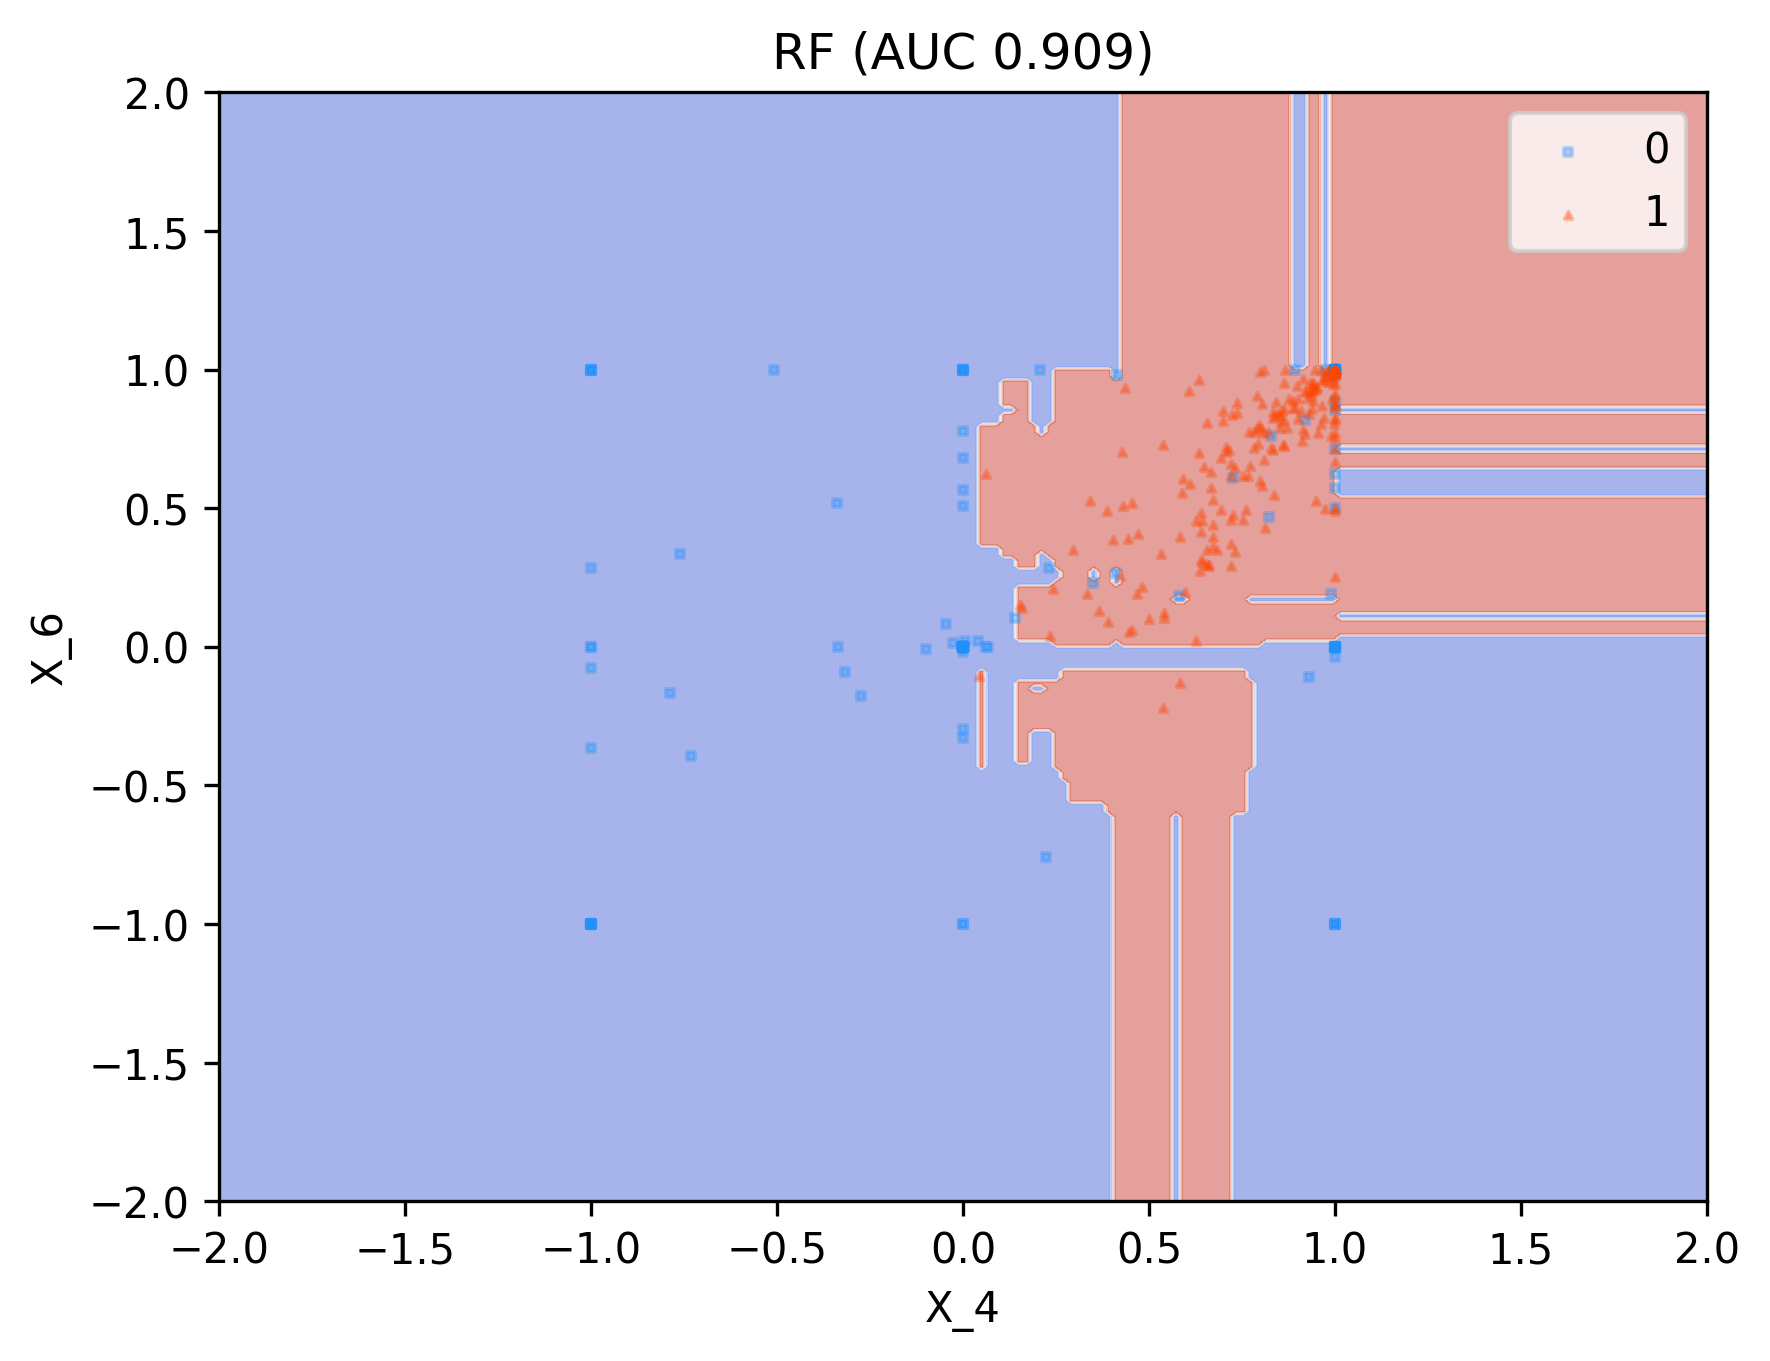

<Figure size 1920x1440 with 0 Axes>

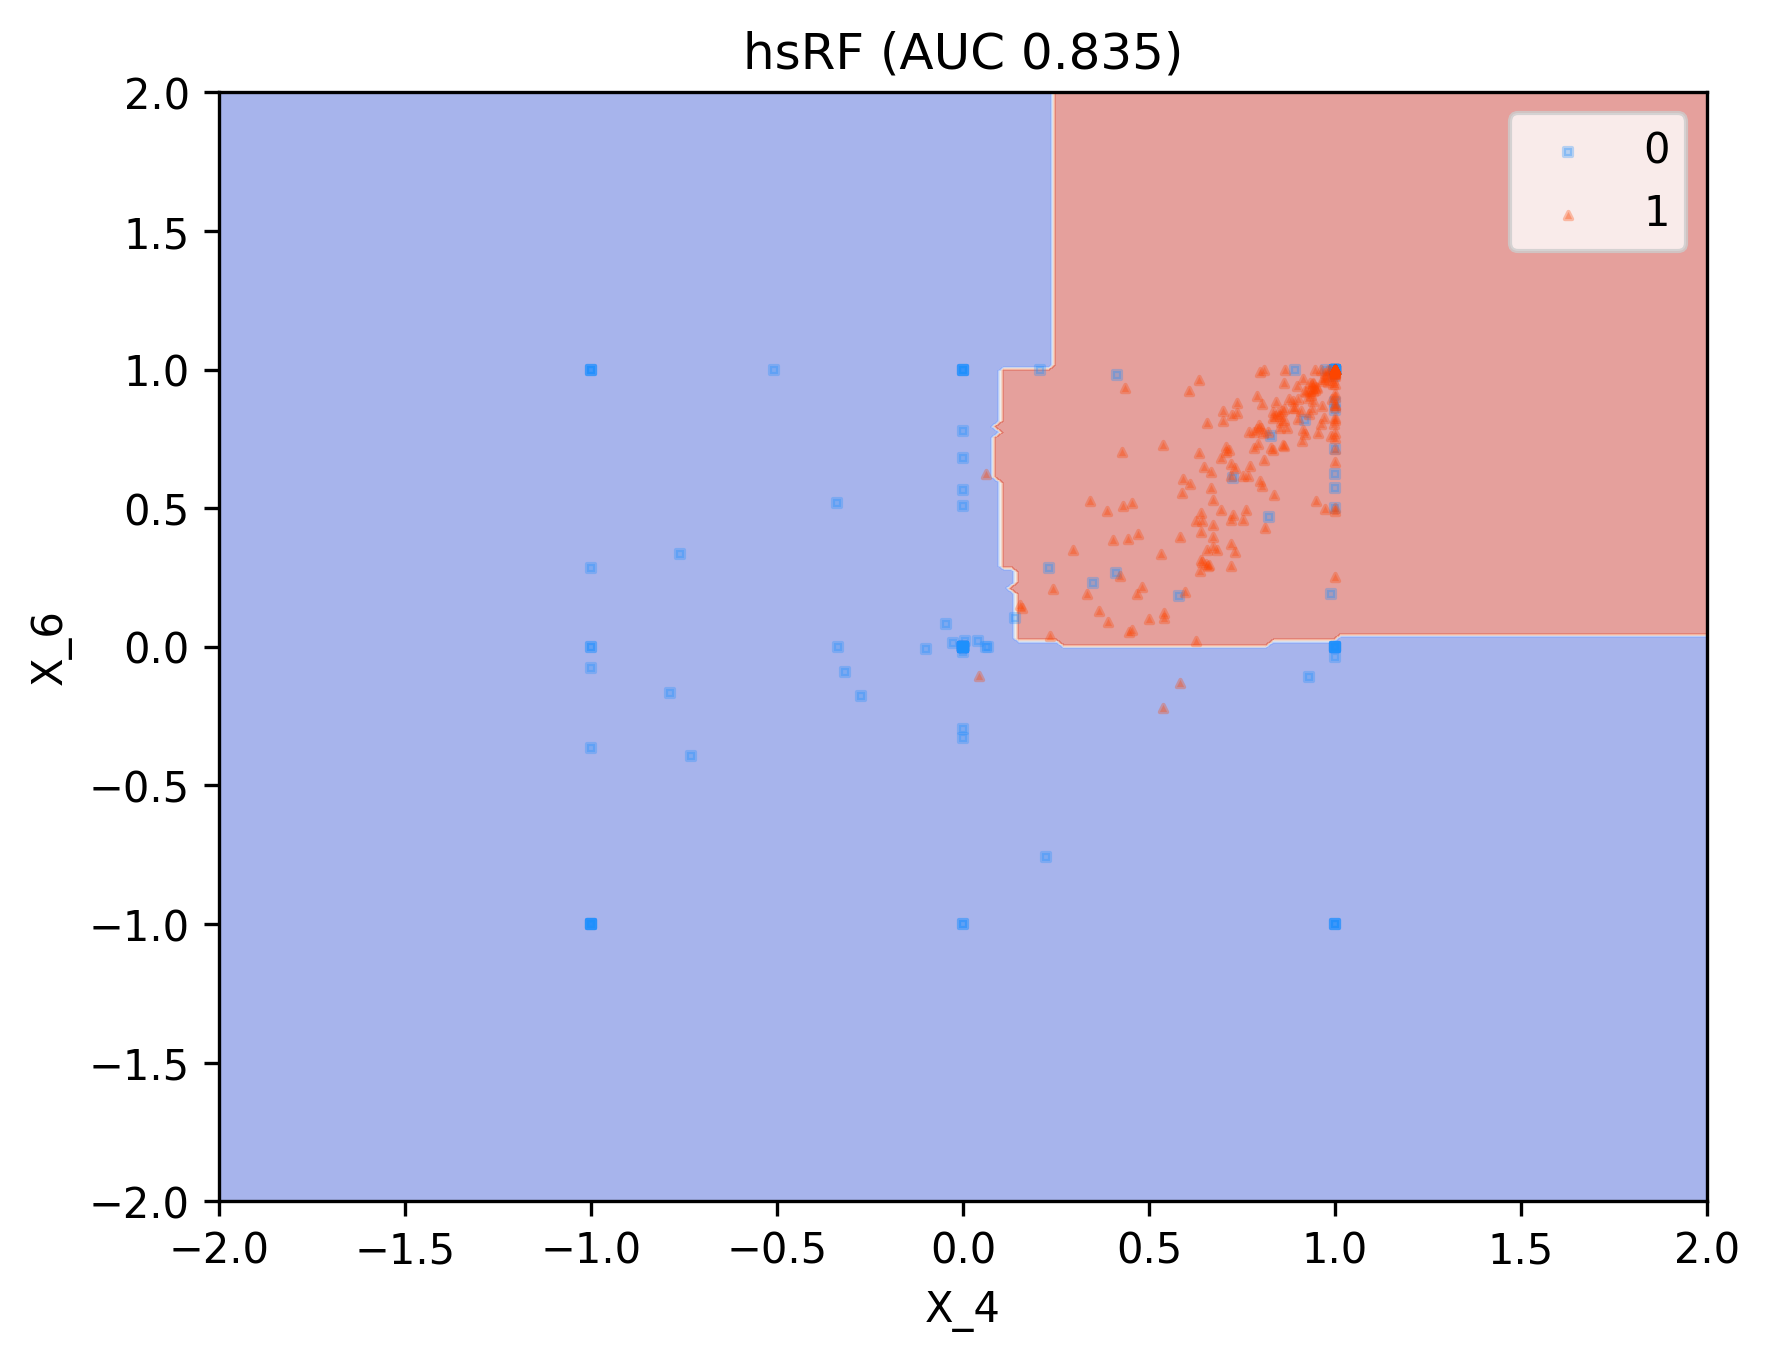

In [20]:
np.random.seed(0)
test_simpler_boundary("ionosphere", "pmlb", "X_4", "X_6", reg_param=100)

     Feature importance
                       A2 | 0.321
                       A6 | 0.229
                       A7 | 0.127
                       A8 | 0.110
                       A3 | 0.091
                       A1 | 0.064
                       A5 | 0.039
                       A4 | 0.019
Provided most important: [A2, A6]


<Figure size 1920x1440 with 0 Axes>

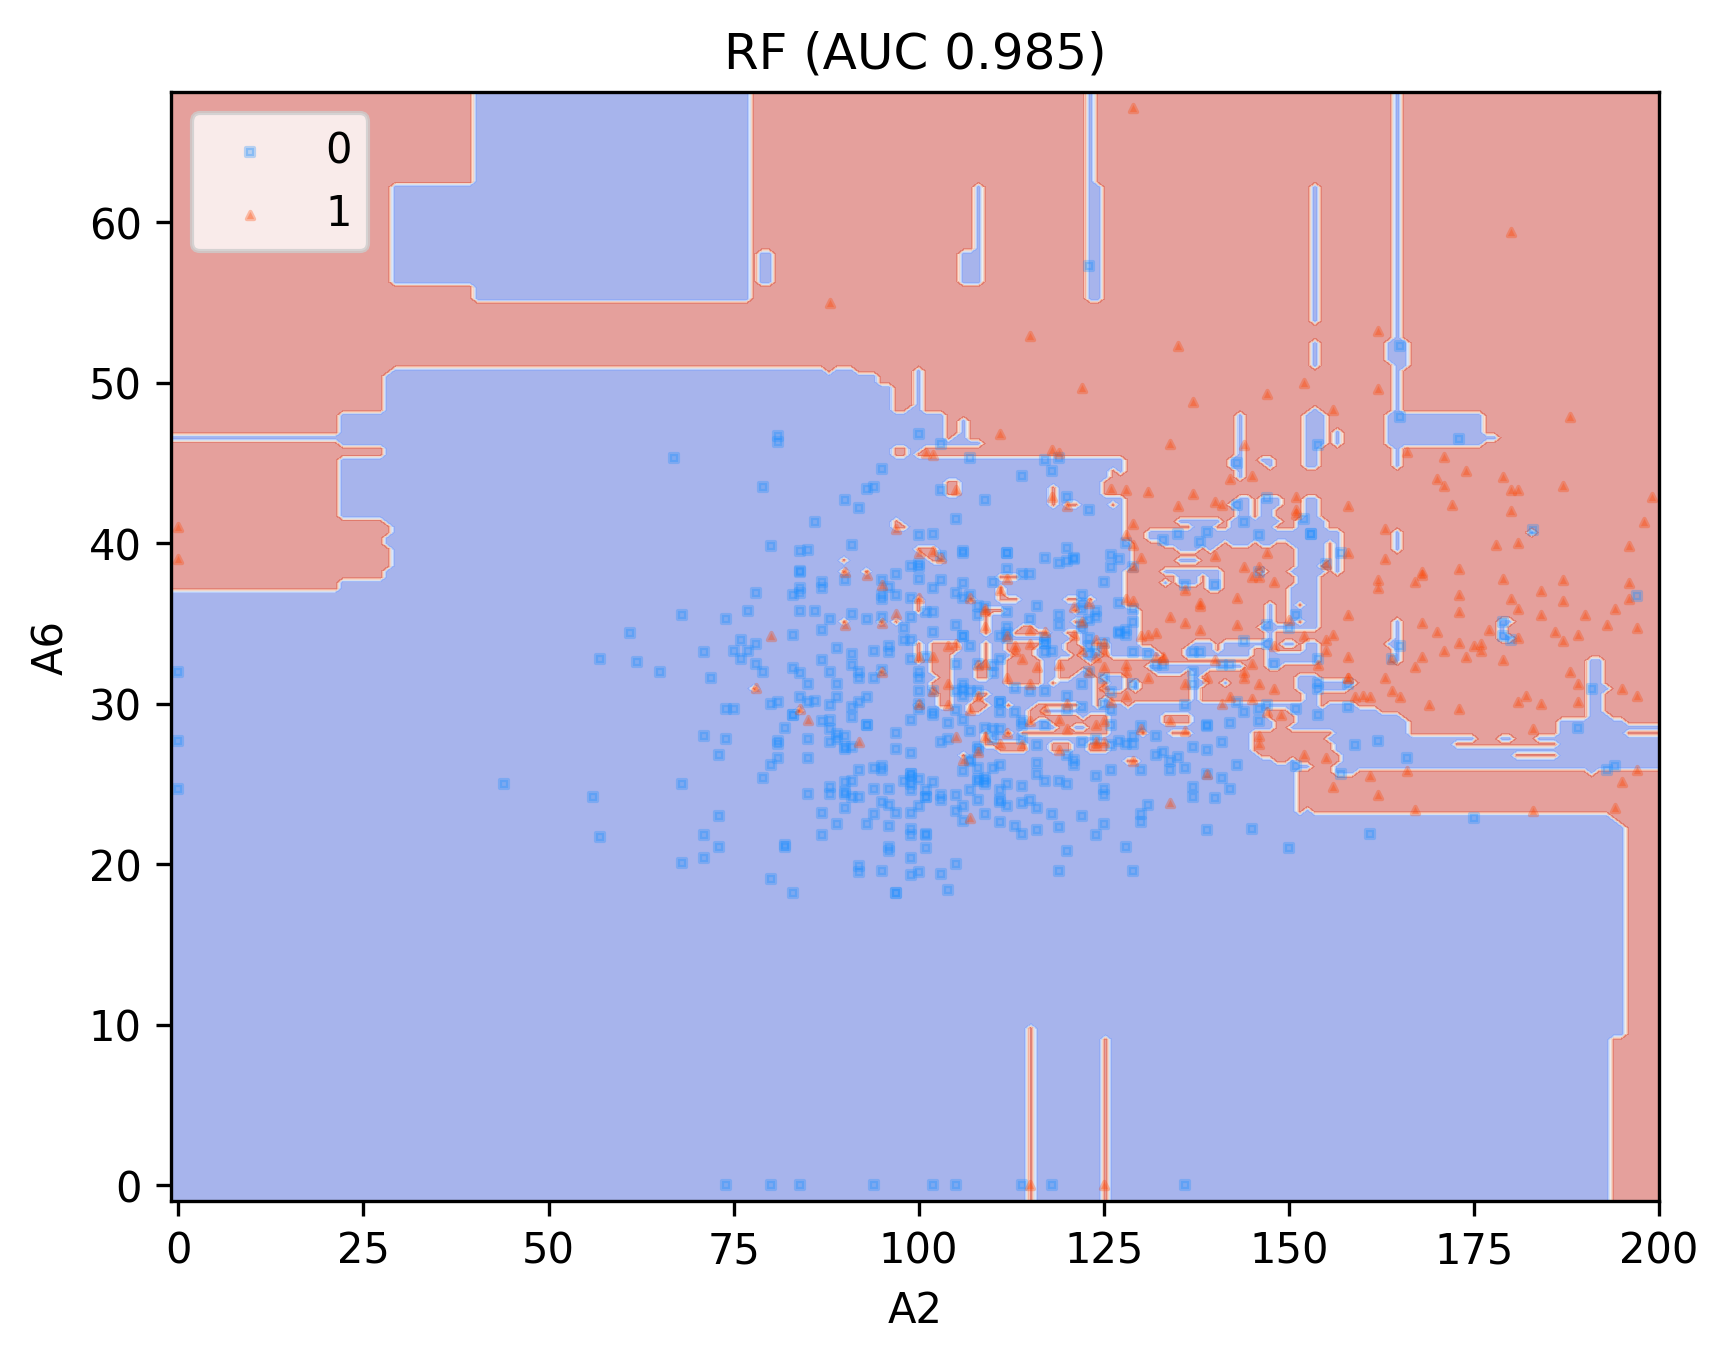

<Figure size 1920x1440 with 0 Axes>

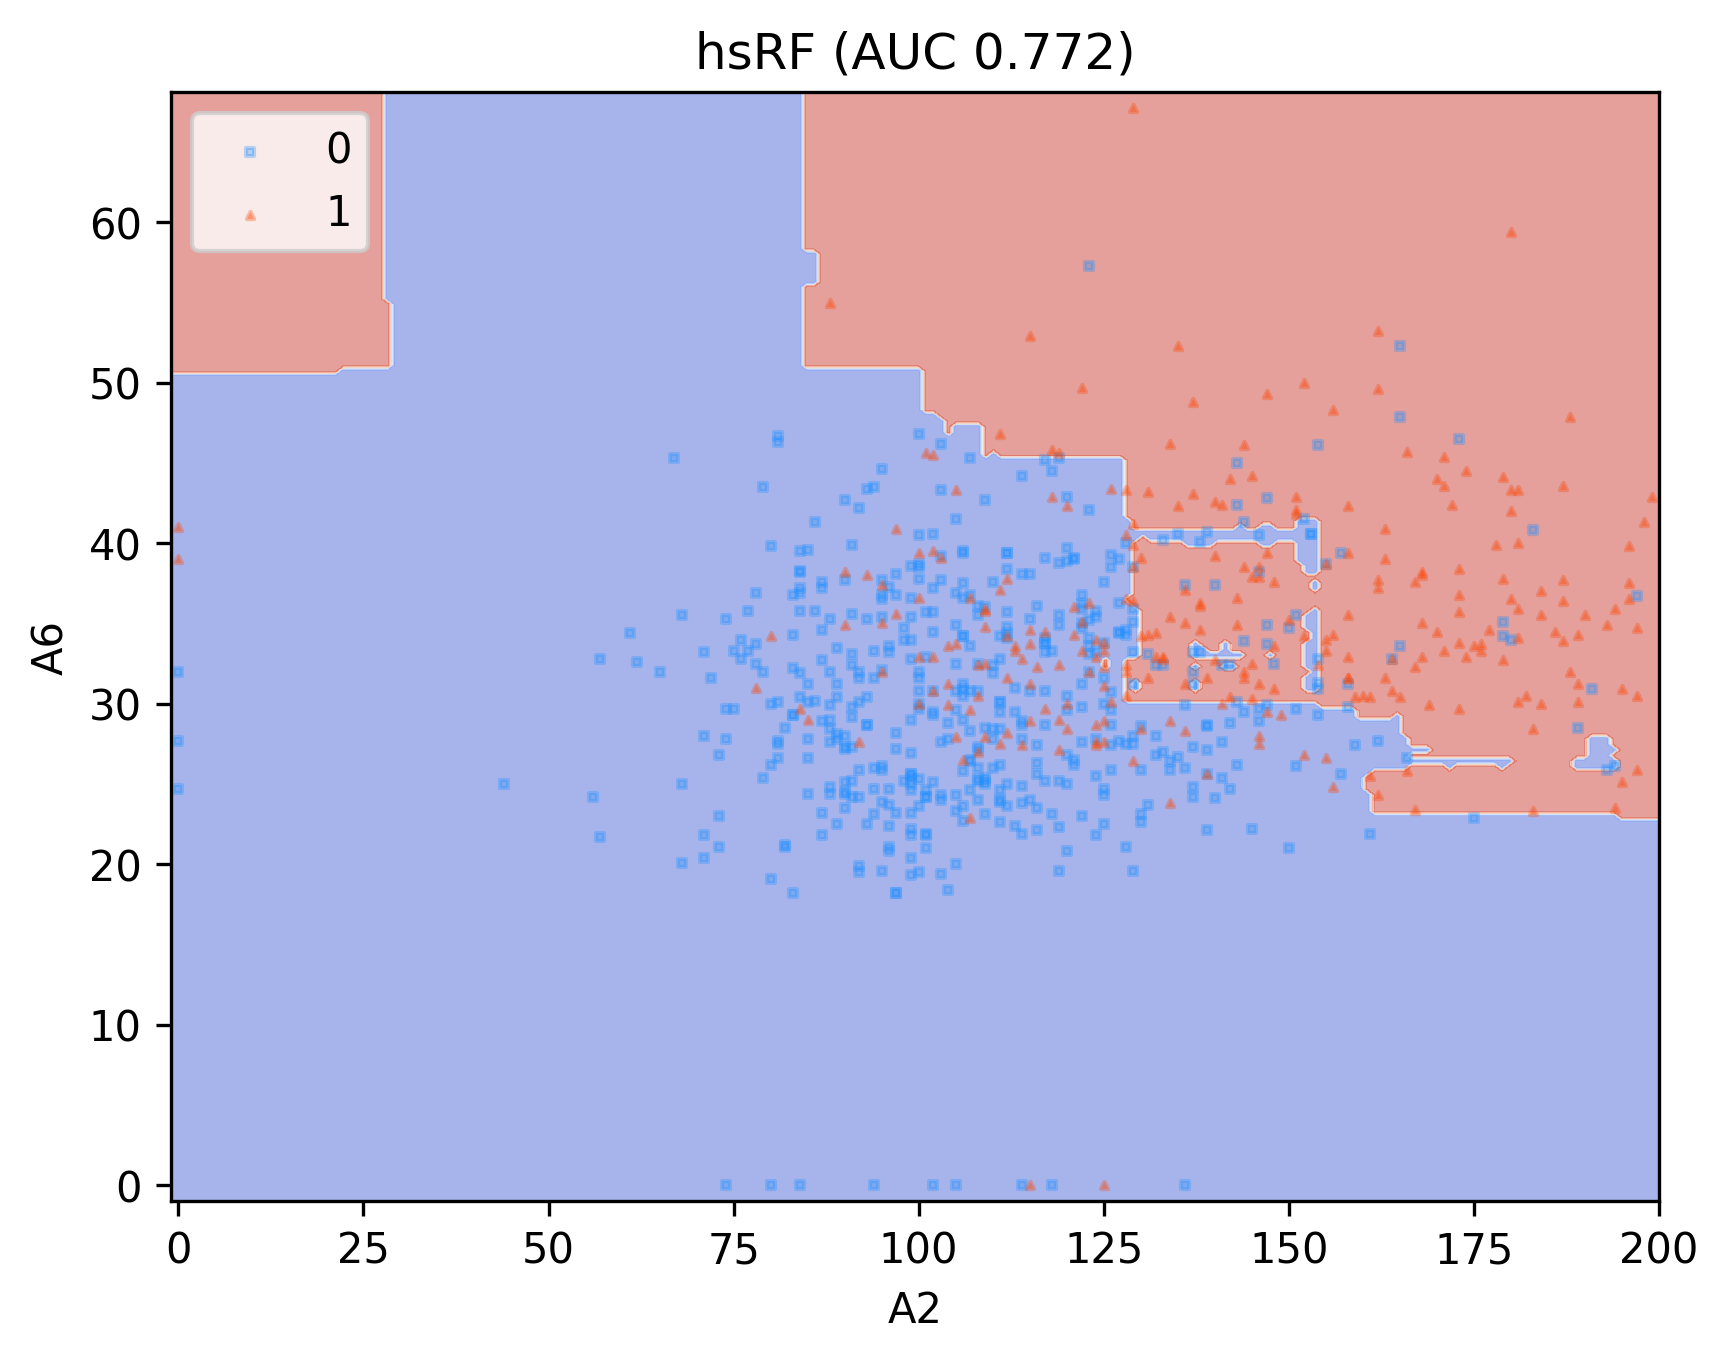

In [21]:
np.random.seed(0)
test_simpler_boundary("diabetes", "pmlb", "A2", "A6", reg_param=100)

     Feature importance
                   Credit | 0.162
                   Status | 0.139
                      Age | 0.111
                 Duration | 0.092
          Savings-account | 0.064
                  Purpose | 0.059
           Residence-time | 0.050
           Credit-history | 0.046
                 Property | 0.043
               Employment | 0.039
Provided most important: [Credit, Age]


<Figure size 1920x1440 with 0 Axes>

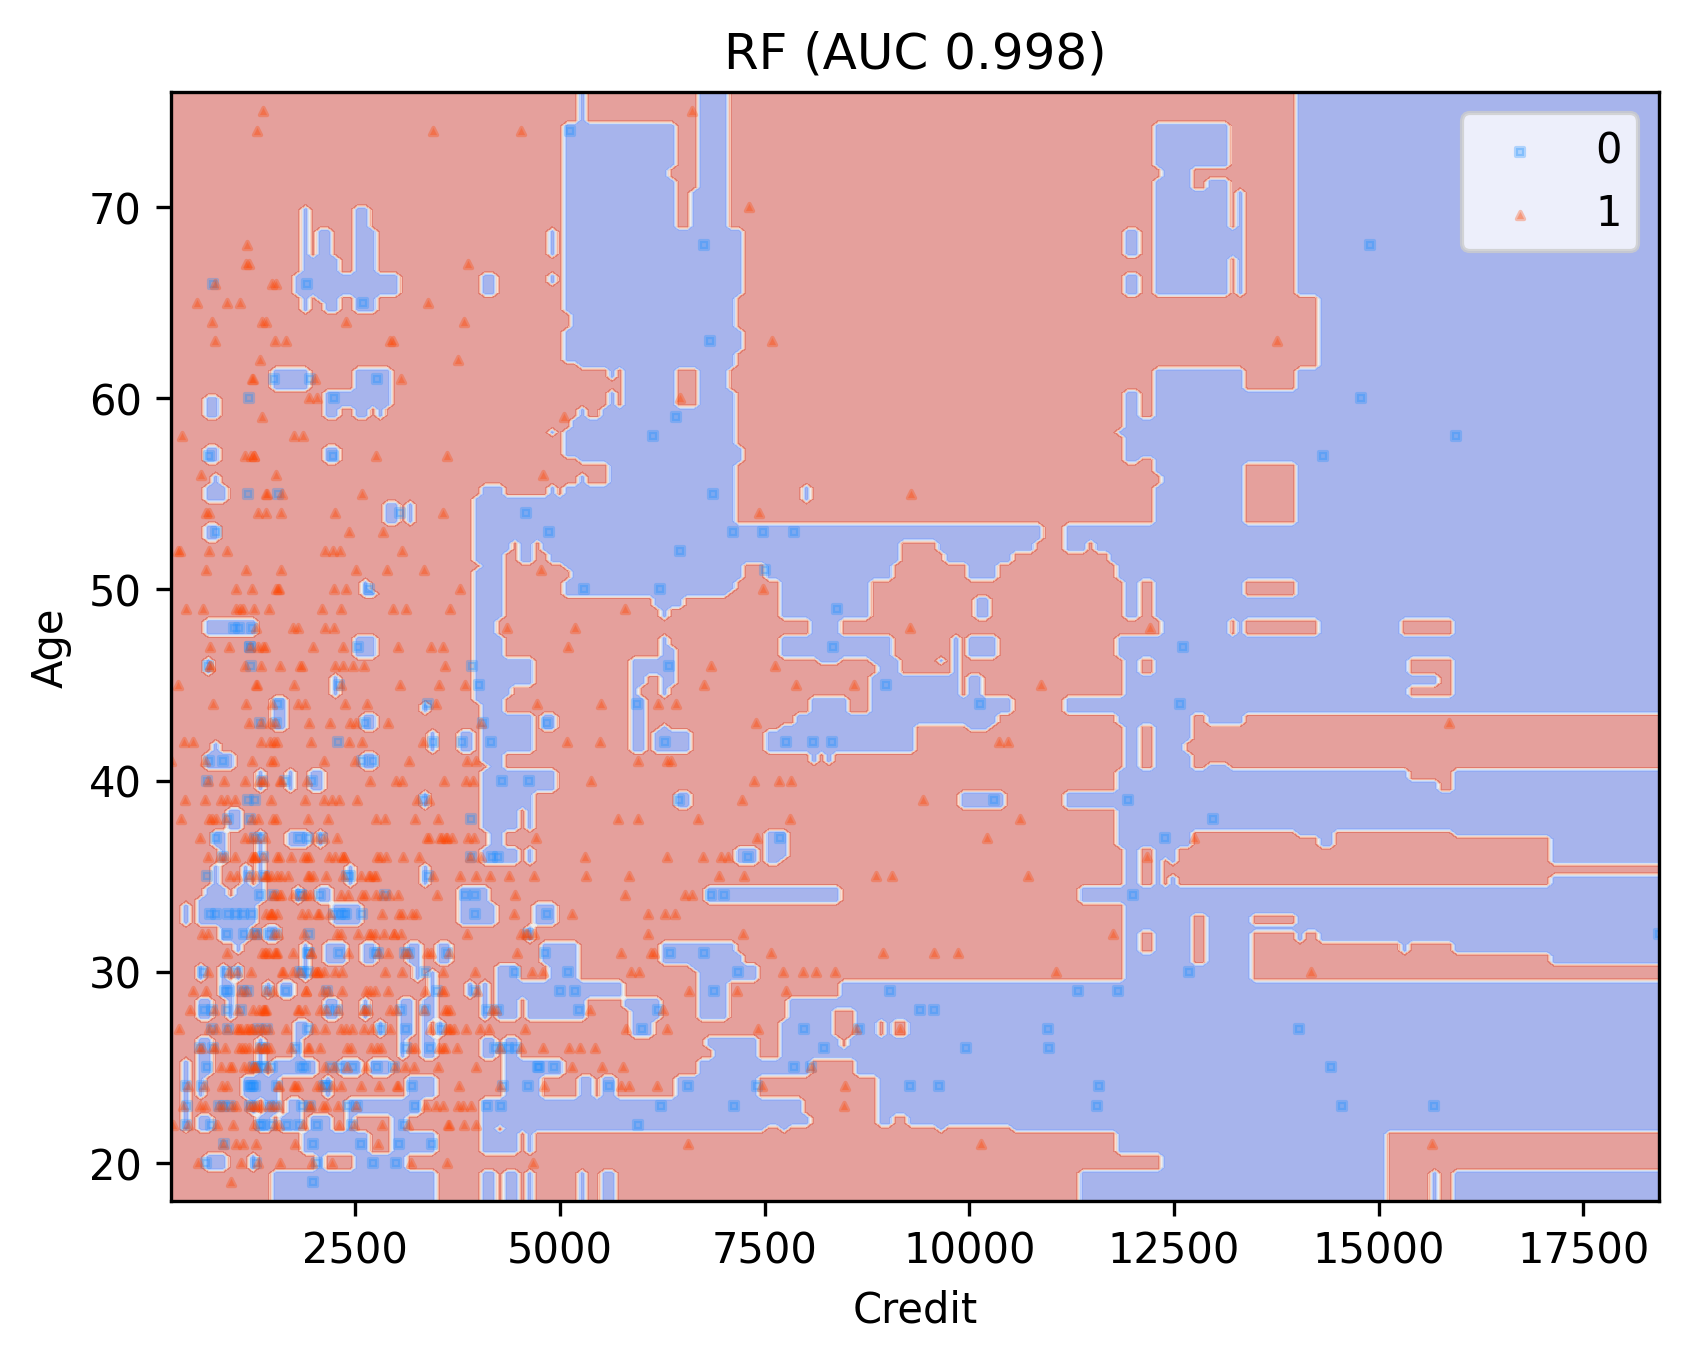

<Figure size 1920x1440 with 0 Axes>

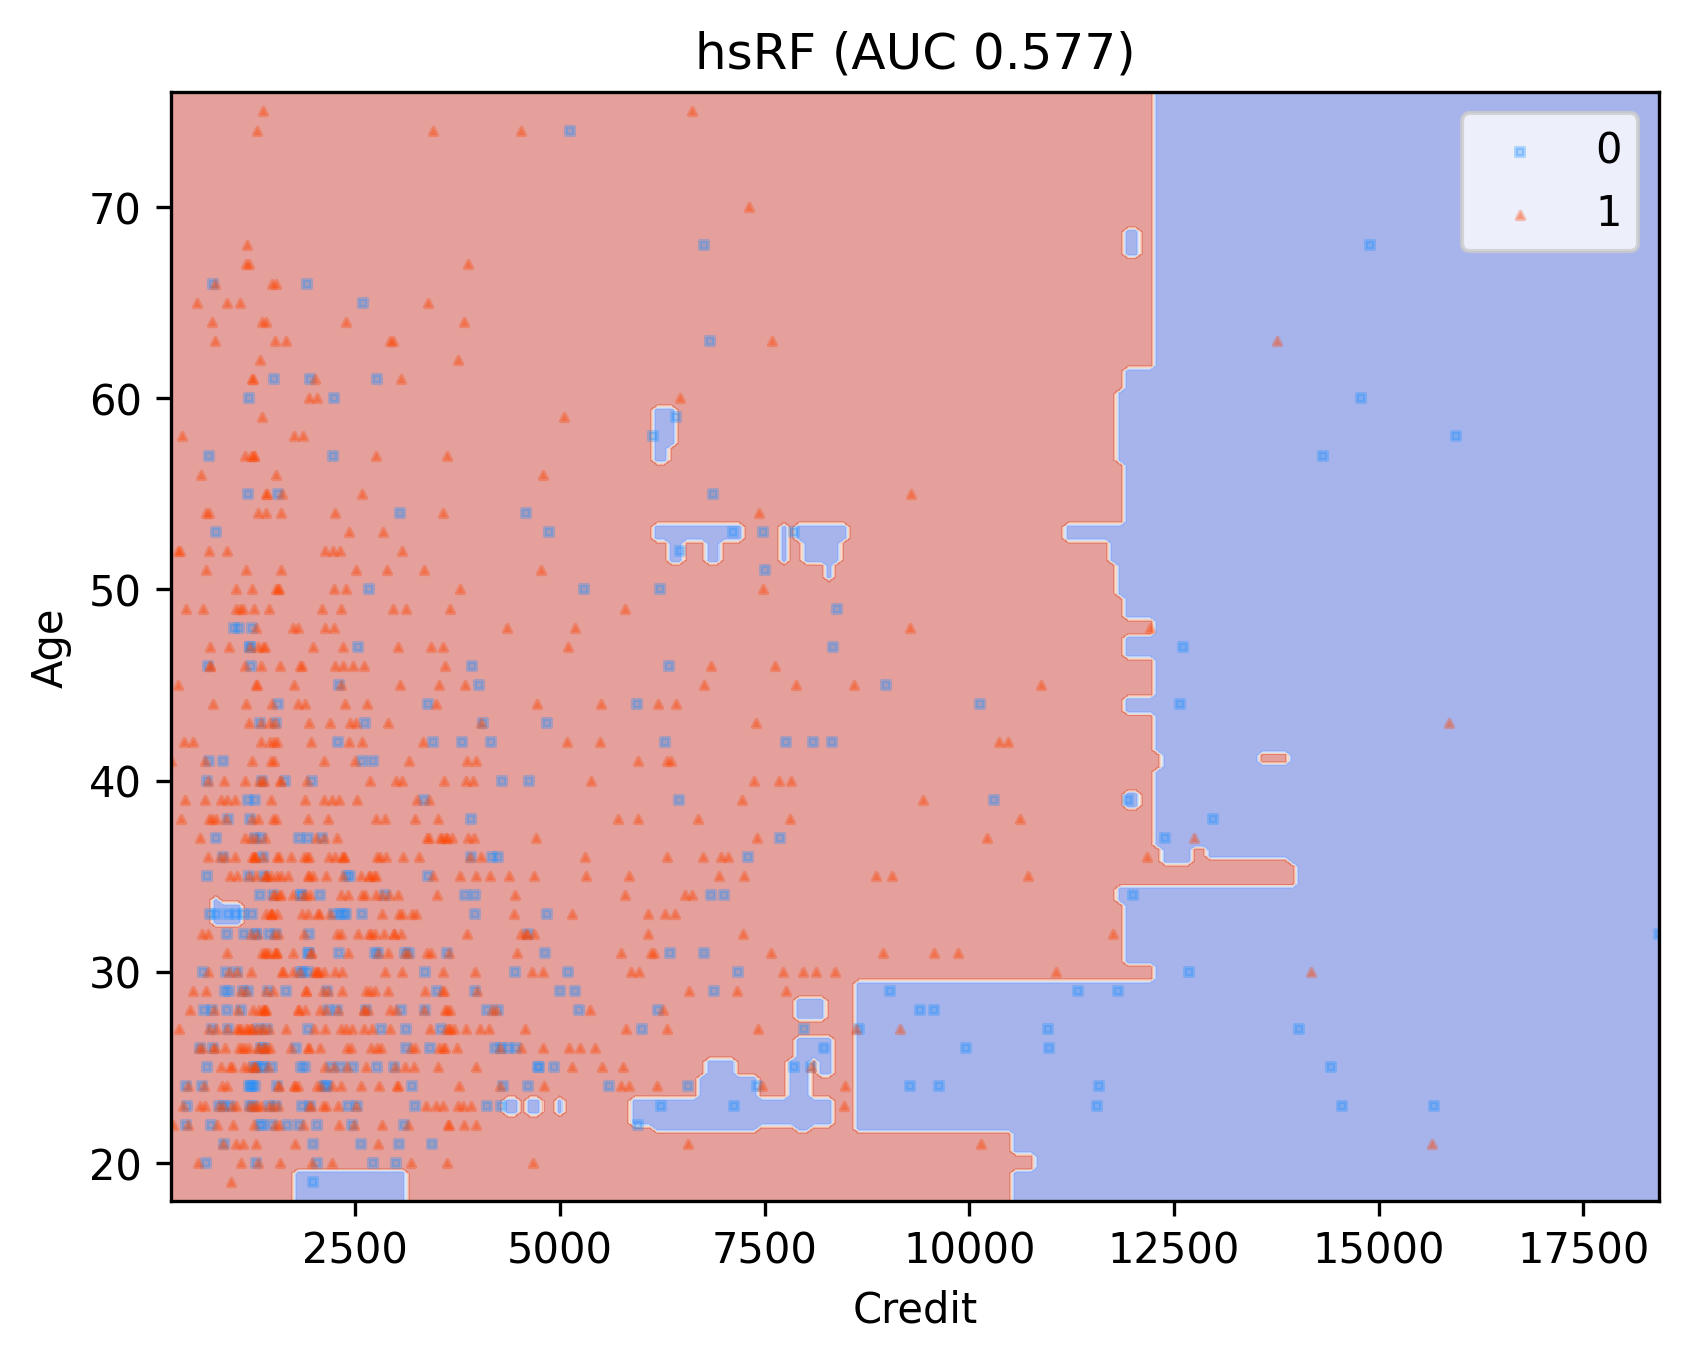

In [22]:
np.random.seed(0)
test_simpler_boundary("german", "pmlb", "Credit", "Age", reg_param=100)

     Feature importance
friends_broken_in_steal:1 | 0.165
         physically_ass:0 | 0.053
             weighting_95 | 0.043
         physically_ass:1 | 0.035
   fr_suggest_agnts_law:2 | 0.032
                      age | 0.016
          drugs_in_comm:1 | 0.014
nonexpermental_marijuana:1 | 0.014
non-exp_past_year_marijuana:1 | 0.013
          drugs_in_comm:2 | 0.012
Provided most important: [friends_broken_in_steal:1, fr_suggest_agnts_law:2]


<Figure size 1920x1440 with 0 Axes>

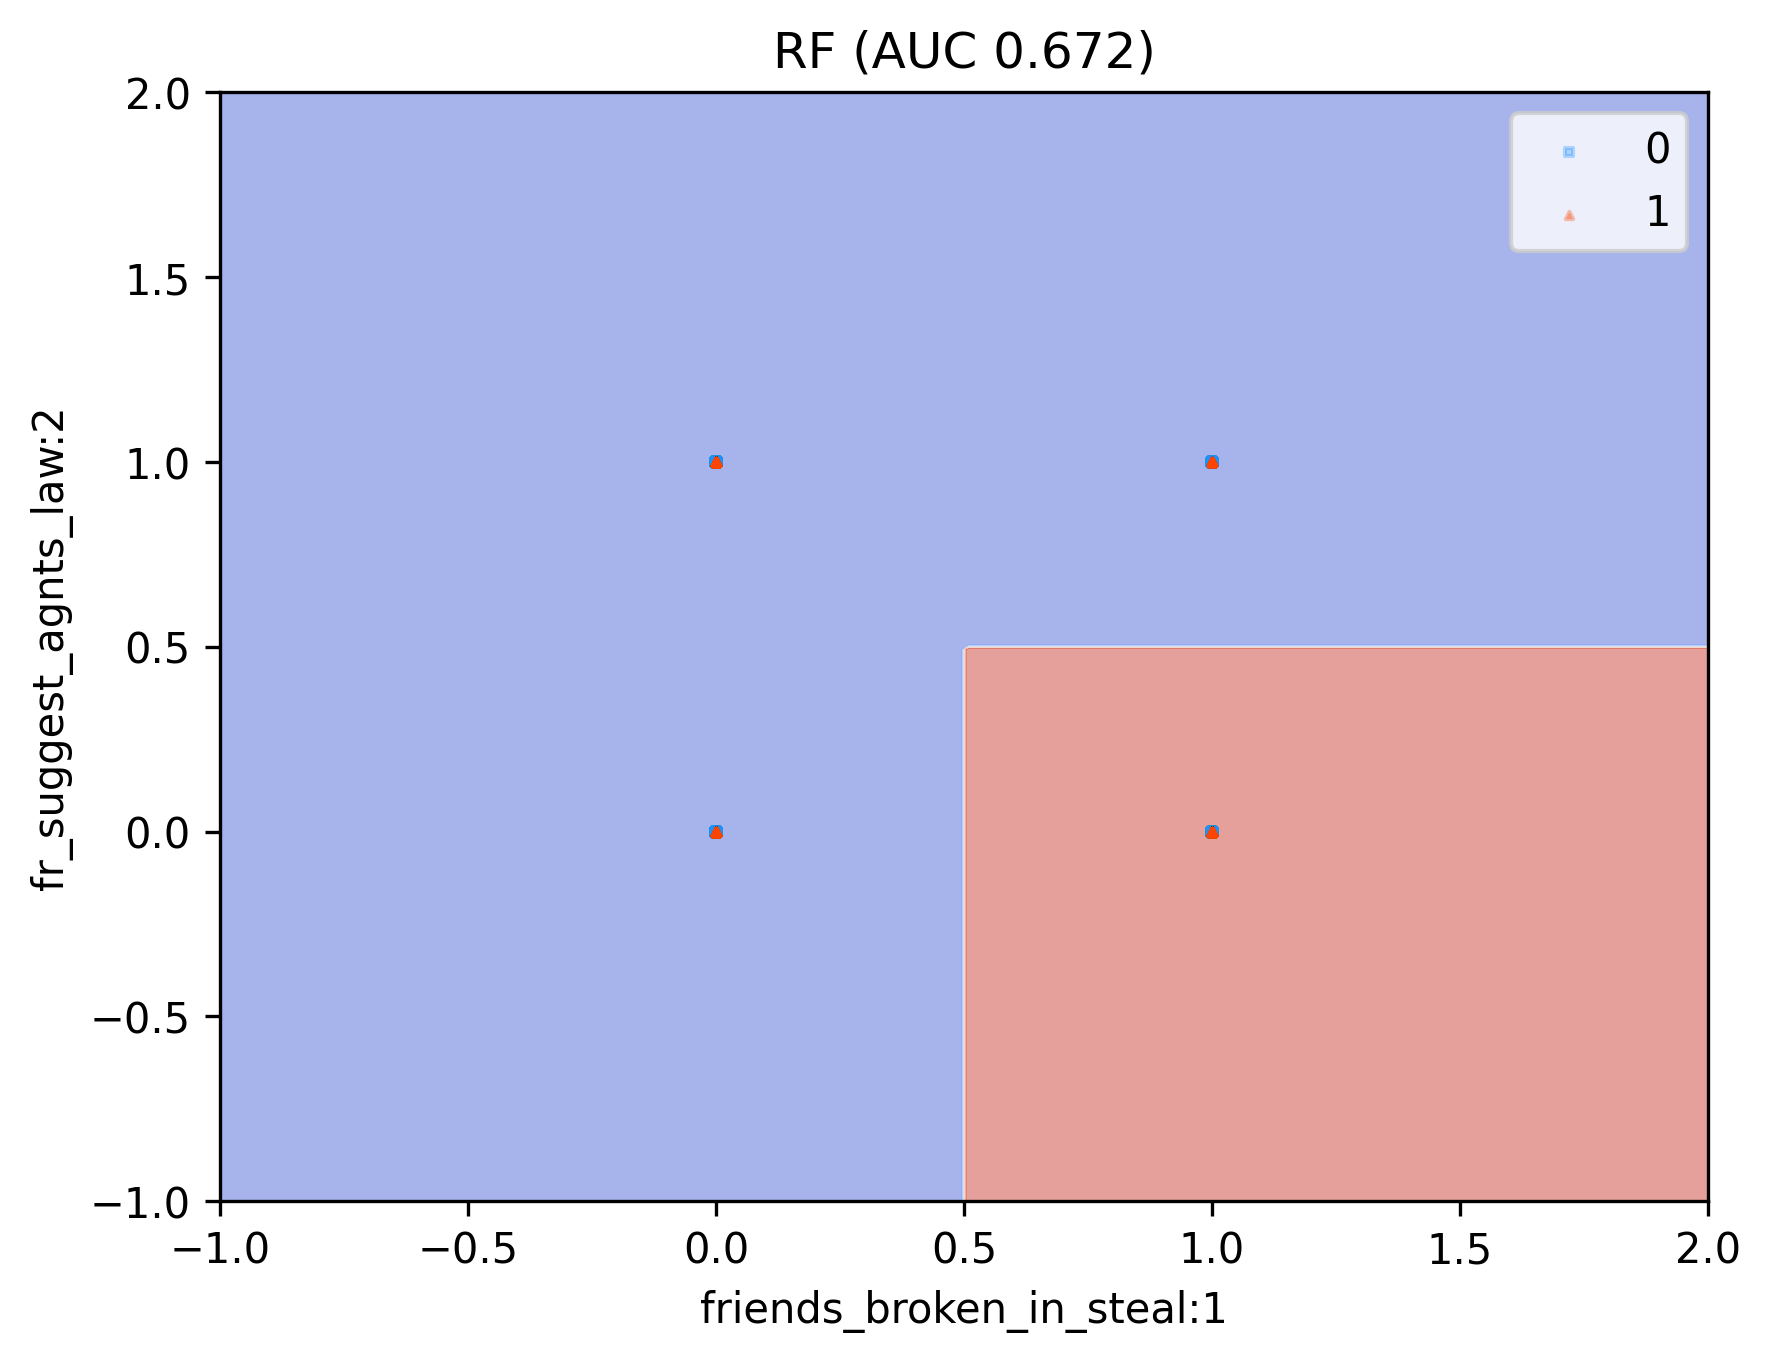

<Figure size 1920x1440 with 0 Axes>

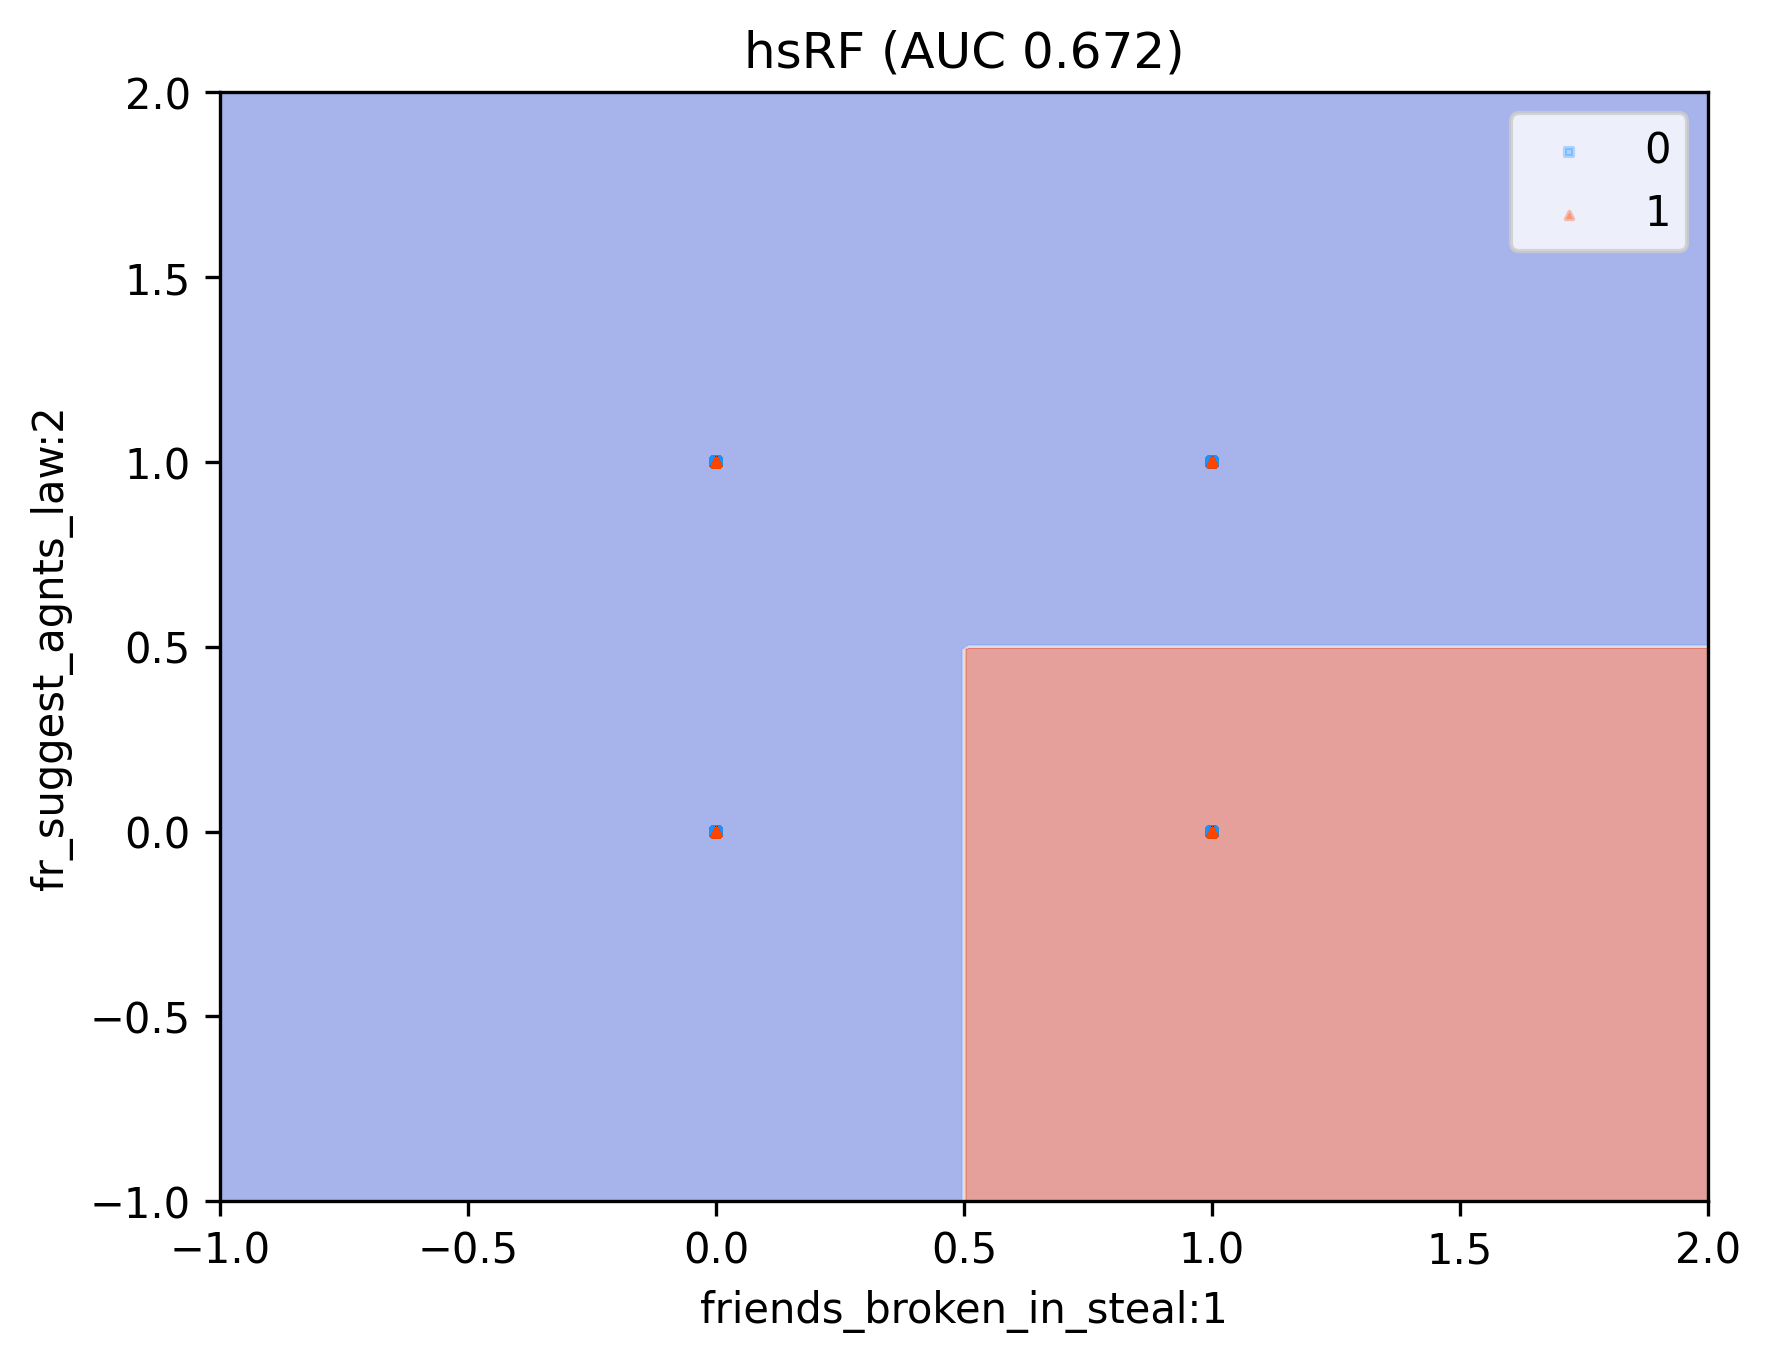

In [23]:
np.random.seed(0)
test_simpler_boundary("juvenile_clean", "imodels", "friends_broken_in_steal:1", "fr_suggest_agnts_law:2", reg_param=100)

     Feature importance
                      age | 0.255
              c_jail_time | 0.197
             priors_count | 0.189
  days_b_screening_arrest | 0.109
           race:Caucasian | 0.030
    race:African-American | 0.030
        c_charge_degree:F | 0.029
        c_charge_degree:M | 0.027
          juv_other_count | 0.022
                 sex:Male | 0.021
Provided most important: [age, priors_count]


<Figure size 1920x1440 with 0 Axes>

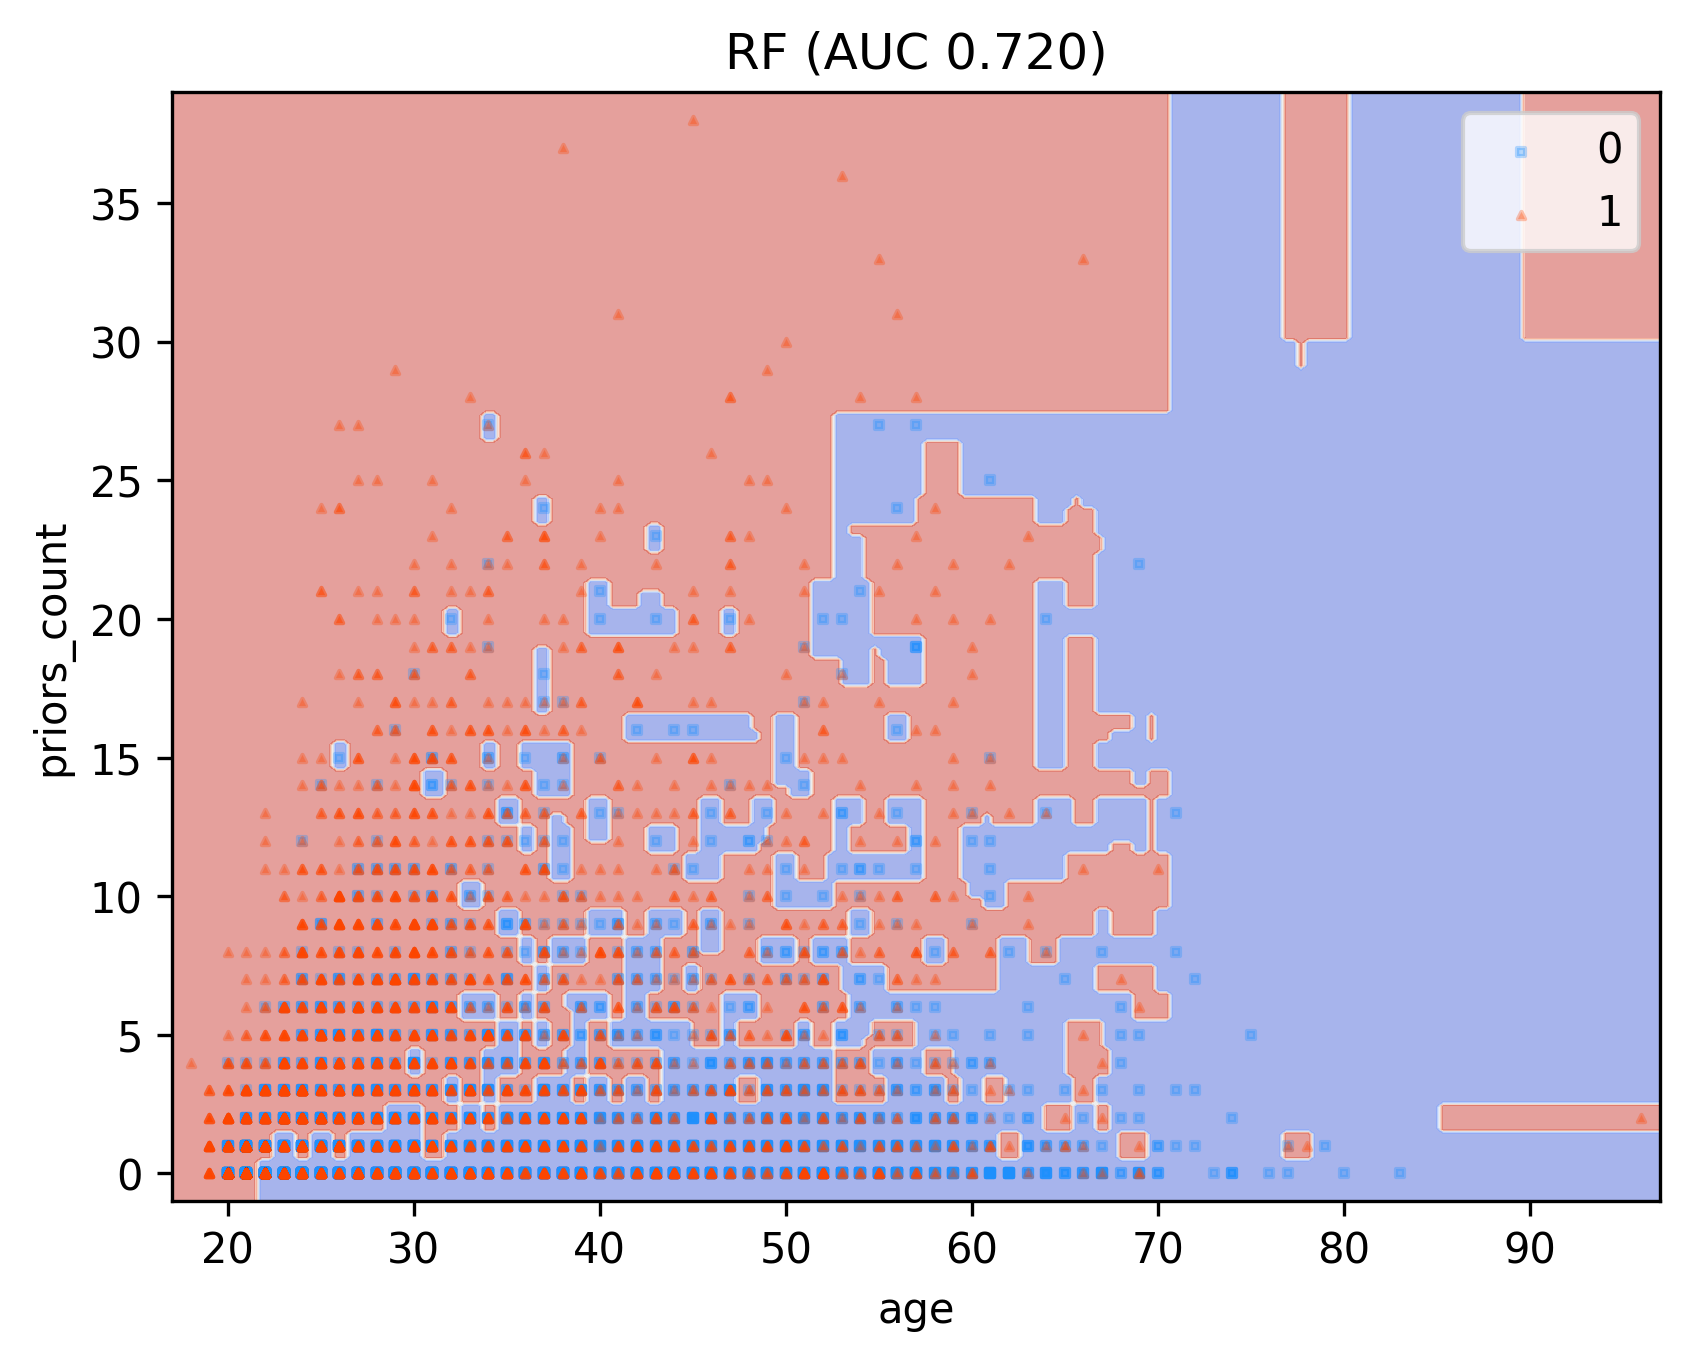

<Figure size 1920x1440 with 0 Axes>

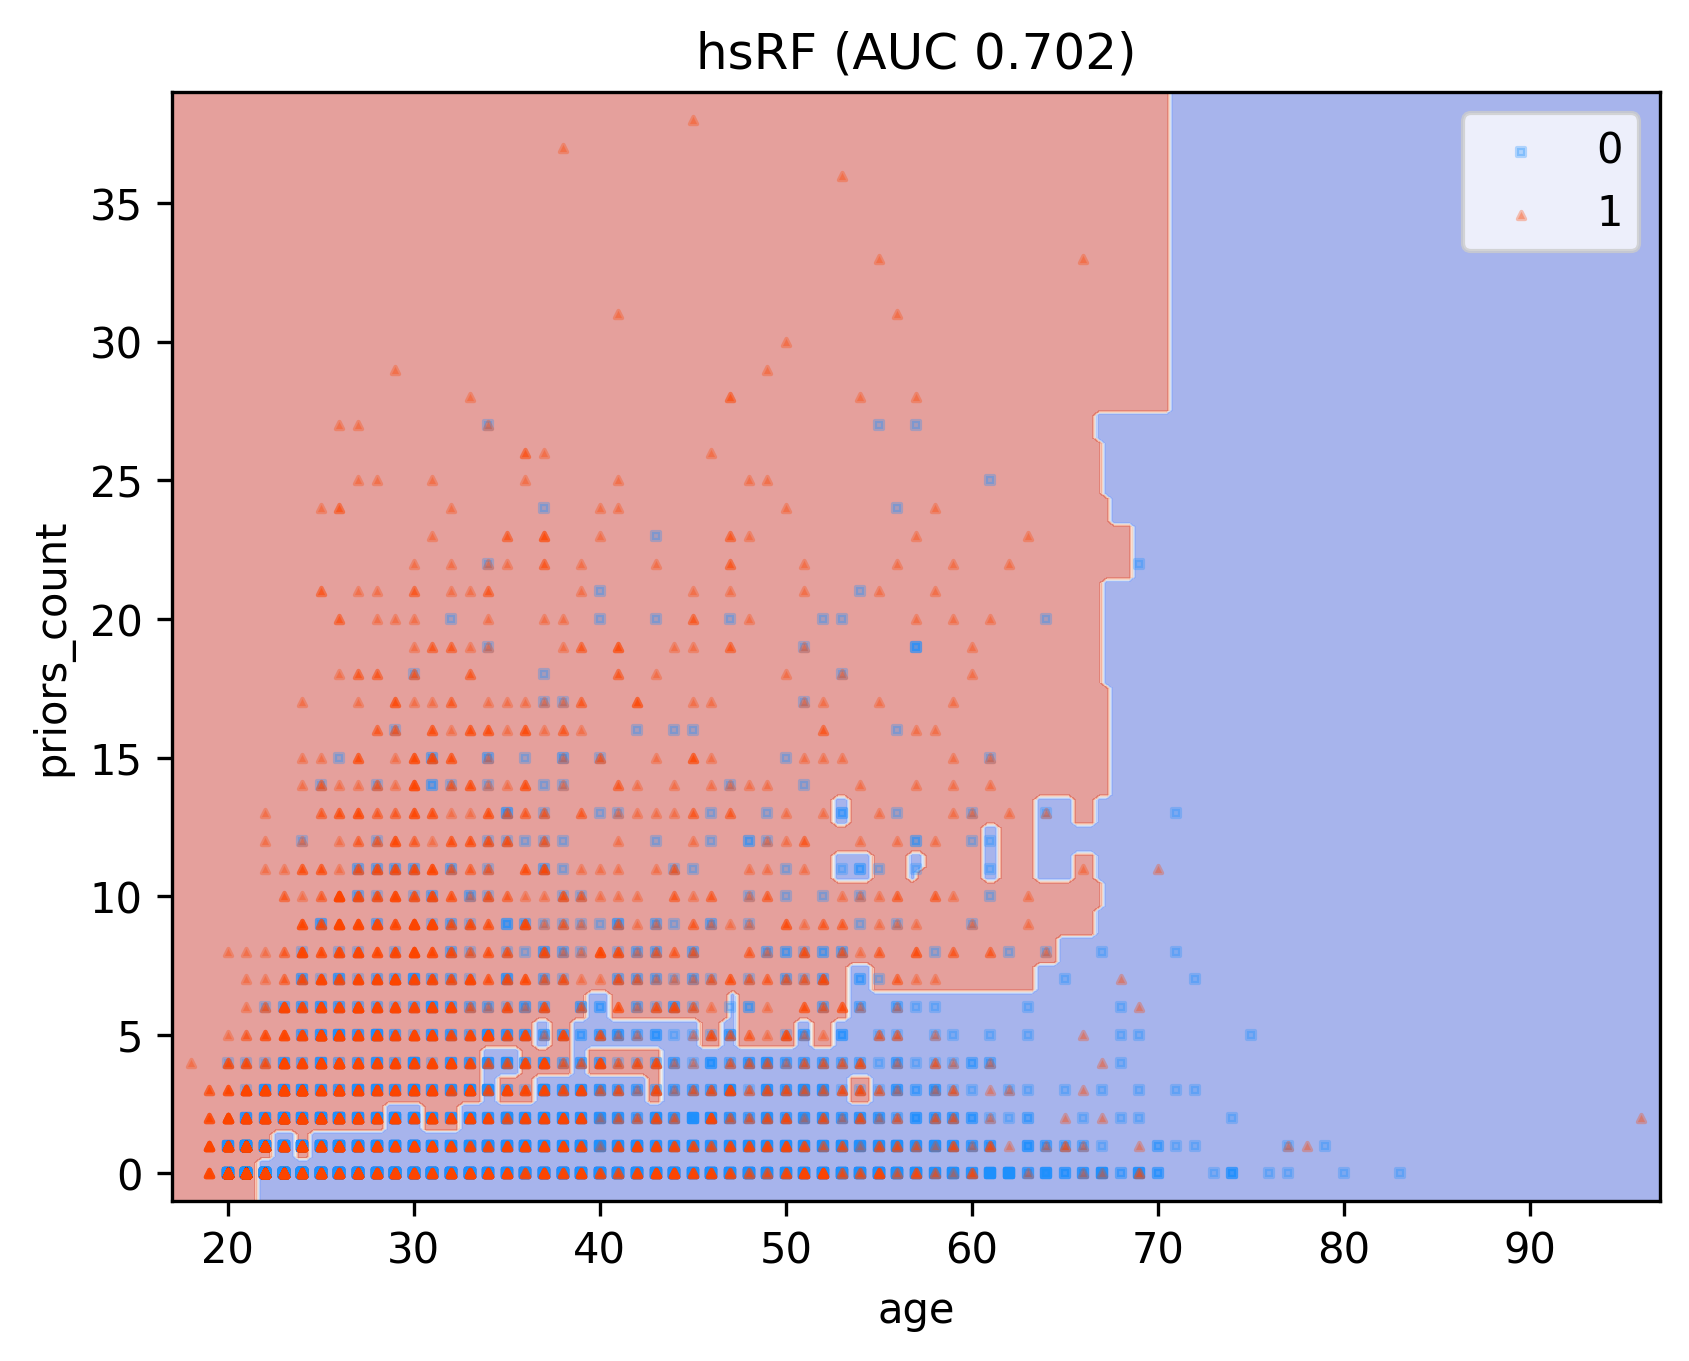

In [24]:
np.random.seed(0)
test_simpler_boundary("compas_two_year_clean", "imodels", "age", "priors_count", reg_param=100)